In [99]:
import pandas as pd
import re
from langdetect import detect
import nltk
from nltk.corpus import stopwords
from datetime import datetime
from wordcloud import WordCloud
from collections import Counter

import gensim
import gensim.corpora as corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from pprint import pprint

In [97]:
nltk.download("stopwords")
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [51]:
df = pd.read_csv('Reddit_Electric_Vehicle.csv')
df.head()

title       id  \
0  General Questions and Purchasing Advice Thread...  1cfxbjo   
1  General Questions and Purchasing Advice Thread...  1cfxbjo   
2  General Questions and Purchasing Advice Thread...  1cfxbjo   
3  General Questions and Purchasing Advice Thread...  1cfxbjo   
4  General Questions and Purchasing Advice Thread...  1cfxbjo   

                                                 url comment_id  \
0  https://www.reddit.com/r/electricvehicles/comm...    l23xw7o   
1  https://www.reddit.com/r/electricvehicles/comm...    l272aoy   
2  https://www.reddit.com/r/electricvehicles/comm...    l28slr1   
3  https://www.reddit.com/r/electricvehicles/comm...    l2a4ss4   
4  https://www.reddit.com/r/electricvehicles/comm...    l2d73it   

   comment_created_utc comment_link_id comment_parent_id  \
0           1714579263      t3_1cfxbjo        t3_1cfxbjo   
1           1714621065      t3_1cfxbjo        t3_1cfxbjo   
2           1714657582      t3_1cfxbjo        t3_1cfxbjo   
3           1714674148      t3_1cfxbjo        t3_1cfxbjo   
4           1714721244      t3_1cfxbjo        t3_1cfxbjo   

                                        comment_body      Type  
0  In looking at the recent news about Hertz sell...  Question  
1  I’m looking between two vehicles. Both are the...  Question  
2  I’m looking to get my first EV to help with th...  Question  
3  Help with Mass EV Rebat (MOR-EV Trucks)  \n  \...  Question  
4  2016 egolf vs 2021 dacia spring\n\nHello every...  Question

In [388]:
df['comment_created_utc'][0]

Timestamp('2024-05-01 17:01:03')

In [55]:
print(datetime.fromtimestamp(df['comment_created_utc'][0]).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.fromtimestamp(df['comment_created_utc'][0]))

2024-05-01 17:01:03
2024-05-01 17:01:03


In [56]:
df['comment_created_utc'] = df['comment_created_utc'].apply(lambda x: datetime.fromtimestamp(x))
df['comment_created_utc'] = pd.to_datetime(df['comment_created_utc'])
df

title       id  \
0      General Questions and Purchasing Advice Thread...  1cfxbjo   
1      General Questions and Purchasing Advice Thread...  1cfxbjo   
2      General Questions and Purchasing Advice Thread...  1cfxbjo   
3      General Questions and Purchasing Advice Thread...  1cfxbjo   
4      General Questions and Purchasing Advice Thread...  1cfxbjo   
...                                                  ...      ...   
55463  Hyundai US boss calls out the competition as t...  1bzdw14   
55464  Hyundai US boss calls out the competition as t...  1bzdw14   
55465  Hyundai US boss calls out the competition as t...  1bzdw14   
55466  Hyundai US boss calls out the competition as t...  1bzdw14   
55467  Hyundai US boss calls out the competition as t...  1bzdw14   

                                                     url comment_id  \
0      https://www.reddit.com/r/electricvehicles/comm...    l23xw7o   
1      https://www.reddit.com/r/electricvehicles/comm...    l272aoy   
2      https://www.reddit.com/r/electricvehicles/comm...    l28slr1   
3      https://www.reddit.com/r/electricvehicles/comm...    l2a4ss4   
4      https://www.reddit.com/r/electricvehicles/comm...    l2d73it   
...                                                  ...        ...   
55463  https://electrek.co/2024/04/08/hyundai-us-boss...    kyrabah   
55464  https://electrek.co/2024/04/08/hyundai-us-boss...    kyseihn   
55465  https://electrek.co/2024/04/08/hyundai-us-boss...    kyqui0w   
55466  https://electrek.co/2024/04/08/hyundai-us-boss...    kyskk7g   
55467  https://electrek.co/2024/04/08/hyundai-us-boss...    kyqw9js   

      comment_created_utc comment_link_id comment_parent_id  \
0     2024-05-01 17:01:03      t3_1cfxbjo        t3_1cfxbjo   
1     2024-05-02 04:37:45      t3_1cfxbjo        t3_1cfxbjo   
2     2024-05-02 14:46:22      t3_1cfxbjo        t3_1cfxbjo   
3     2024-05-02 19:22:28      t3_1cfxbjo        t3_1cfxbjo   
4     2024-05-03 08:27:24      t3_1cfxbjo        t3_1cfxbjo   
...                   ...             ...               ...   
55463 2024-04-09 13:08:06      t3_1bzdw14        t1_kyr9y21   
55464 2024-04-09 17:23:46      t3_1bzdw14        t1_kys5ns3   
55465 2024-04-09 10:30:42      t3_1bzdw14        t1_kyquenr   
55466 2024-04-09 17:58:06      t3_1bzdw14        t1_kyseihn   
55467 2024-04-09 10:52:28      t3_1bzdw14        t1_kyqui0w   

                                            comment_body      Type  
0      In looking at the recent news about Hertz sell...  Question  
1      I’m looking between two vehicles. Both are the...  Question  
2      I’m looking to get my first EV to help with th...  Question  
3      Help with Mass EV Rebat (MOR-EV Trucks)  \n  \...  Question  
4      2016 egolf vs 2021 dacia spring\n\nHello every...  Question  
...                                                  ...       ...  
55463  No, you are perfectly free to own an EV in the...     Reply  
55464        So what’s your excuse for misinformation???     Reply  
55465  Once you figure out there's only one app, basi...     Reply  
55466                              Which misinformation?     Reply  
55467                                     Good to know.!     Reply  

[55468 rows x 9 columns]

In [292]:
def Type_Comment(row):
    if row["comment_link_id"] == row["comment_parent_id"]:
        return "Question"
    else:
        return "Reply"

df["Type"] = df.apply(Type_Comment, axis=1)  
df

title       id  \
0      General Questions and Purchasing Advice Thread...  1cfxbjo   
1      General Questions and Purchasing Advice Thread...  1cfxbjo   
2      General Questions and Purchasing Advice Thread...  1cfxbjo   
3      General Questions and Purchasing Advice Thread...  1cfxbjo   
4      General Questions and Purchasing Advice Thread...  1cfxbjo   
...                                                  ...      ...   
55463  Hyundai US boss calls out the competition as t...  1bzdw14   
55464  Hyundai US boss calls out the competition as t...  1bzdw14   
55465  Hyundai US boss calls out the competition as t...  1bzdw14   
55466  Hyundai US boss calls out the competition as t...  1bzdw14   
55467  Hyundai US boss calls out the competition as t...  1bzdw14   

                                                     url comment_id  \
0      https://www.reddit.com/r/electricvehicles/comm...    l23xw7o   
1      https://www.reddit.com/r/electricvehicles/comm...    l272aoy   
2      https://www.reddit.com/r/electricvehicles/comm...    l28slr1   
3      https://www.reddit.com/r/electricvehicles/comm...    l2a4ss4   
4      https://www.reddit.com/r/electricvehicles/comm...    l2d73it   
...                                                  ...        ...   
55463  https://electrek.co/2024/04/08/hyundai-us-boss...    kyrabah   
55464  https://electrek.co/2024/04/08/hyundai-us-boss...    kyseihn   
55465  https://electrek.co/2024/04/08/hyundai-us-boss...    kyqui0w   
55466  https://electrek.co/2024/04/08/hyundai-us-boss...    kyskk7g   
55467  https://electrek.co/2024/04/08/hyundai-us-boss...    kyqw9js   

      comment_created_utc comment_link_id comment_parent_id  \
0     2024-05-01 17:01:03      t3_1cfxbjo        t3_1cfxbjo   
1     2024-05-02 04:37:45      t3_1cfxbjo        t3_1cfxbjo   
2     2024-05-02 14:46:22      t3_1cfxbjo        t3_1cfxbjo   
3     2024-05-02 19:22:28      t3_1cfxbjo        t3_1cfxbjo   
4     2024-05-03 08:27:24      t3_1cfxbjo        t3_1cfxbjo   
...                   ...             ...               ...   
55463 2024-04-09 13:08:06      t3_1bzdw14        t1_kyr9y21   
55464 2024-04-09 17:23:46      t3_1bzdw14        t1_kys5ns3   
55465 2024-04-09 10:30:42      t3_1bzdw14        t1_kyquenr   
55466 2024-04-09 17:58:06      t3_1bzdw14        t1_kyseihn   
55467 2024-04-09 10:52:28      t3_1bzdw14        t1_kyqui0w   

                                            comment_body      Type  
0      In looking at the recent news about Hertz sell...  Question  
1      I’m looking between two vehicles. Both are the...  Question  
2      I’m looking to get my first EV to help with th...  Question  
3      Help with Mass EV Rebat (MOR-EV Trucks)  \n  \...  Question  
4      2016 egolf vs 2021 dacia spring\n\nHello every...  Question  
...                                                  ...       ...  
55463  No, you are perfectly free to own an EV in the...     Reply  
55464        So what’s your excuse for misinformation???     Reply  
55465  Once you figure out there's only one app, basi...     Reply  
55466                              Which misinformation?     Reply  
55467                                     Good to know.!     Reply  

[55468 rows x 9 columns]

In [168]:
df.columns

Index(['title', 'id', 'url', 'comment_id', 'comment_created_utc',
       'comment_link_id', 'comment_parent_id', 'comment_body', 'Type'],
      dtype='object')

In [214]:
x = df.groupby(['title','Type'],group_keys=True).apply(pd.DataFrame)
x

title  \
title                                              Type                                                                
 Is I.D. Buzz not the minivan you've been askin... Question 40540   Is I.D. Buzz not the minivan you've been aski...   
                                                            40541   Is I.D. Buzz not the minivan you've been aski...   
                                                            40542   Is I.D. Buzz not the minivan you've been aski...   
                                                            40543   Is I.D. Buzz not the minivan you've been aski...   
                                                            40544   Is I.D. Buzz not the minivan you've been aski...   
...                                                                                                              ...   
£100 a week EV megatest | Which electric £40k c... Question 20111  £100 a week EV megatest | Which electric £40k ...   
                                                            20112  £100 a week EV megatest | Which electric £40k ...   
                                                            20113  £100 a week EV megatest | Which electric £40k ...   
                                                            20114  £100 a week EV megatest | Which electric £40k ...   
                                                   Reply    20115  £100 a week EV megatest | Which electric £40k ...   

                                                                        id  \
title                                              Type                      
 Is I.D. Buzz not the minivan you've been askin... Question 40540  1c5560q   
                                                            40541  1c5560q   
                                                            40542  1c5560q   
                                                            40543  1c5560q   
                                                            40544  1c5560q   
...                                                                    ...   
£100 a week EV megatest | Which electric £40k c... Question 20111  1cc617d   
                                                            20112  1cc617d   
                                                            20113  1cc617d   
                                                            20114  1cc617d   
                                                   Reply    20115  1cc617d   

                                                                                                                 url  \
title                                              Type                                                                
 Is I.D. Buzz not the minivan you've been askin... Question 40540  https://www.reddit.com/r/electricvehicles/comm...   
                                                            40541  https://www.reddit.com/r/electricvehicles/comm...   
                                                            40542  https://www.reddit.com/r/electricvehicles/comm...   
                                                            40543  https://www.reddit.com/r/electricvehicles/comm...   
                                                            40544  https://www.reddit.com/r/electricvehicles/comm...   
...                                                                                                              ...   
£100 a week EV megatest | Which electric £40k c... Question 20111        https://www.youtube.com/watch?v=pbSYBmICESM   
                                                            20112        https://www.youtube.com/watch?v=pbSYBmICESM   
                                                            20113        https://www.youtube.com/watch?v=pbSYBmICESM   
                                                            20114        https://www.youtube.com/watch?v=pbSYBmICESM   
                                                   Reply    20115        https://www.youtube.co

In [219]:
for name in x.index:
    print (name)
    print (x.loc[name])
    break

(" Is I.D. Buzz not the minivan you've been asking for?", 'Question', 40540)
title                   Is I.D. Buzz not the minivan you've been aski...
id                                                               1c5560q
url                    https://www.reddit.com/r/electricvehicles/comm...
comment_id                                                       kzrxhfy
comment_created_utc                                  2024-04-16 03:41:42
comment_link_id                                               t3_1c5560q
comment_parent_id                                             t3_1c5560q
comment_body            It’s not out yet, at least not in North America.
Type                                                            Question
Name: ( Is I.D. Buzz not the minivan you've been asking for?, Question, 40540), dtype: object


In [5]:
def no_retweets(text):
    keep = []
    for word in text.split():
        if not word.startswith("@"):
            keep.append(word)
    return ' '.join(keep)

def no_http_links(text):
    keep = []
    for word in text.split():
        if not word.startswith("http"):
            keep.append(word)
    return ' '.join(keep)

In [652]:
def preprocessing_text(text):
    text = text.lower()
    text = text.strip()
    pattern = r'\!\[gif\]\(emote\|free_emotes_pack\|\w+\)'
    text = re.sub(pattern, ' ', text)
    
    pattern = r"\!+"
    text = re.sub(pattern, " ", text)
    pattern = r"\?+"
    text =text.replace('(', ' ')
    text =text.replace('[', ' ')
    
    text = no_retweets(text)
    text = no_http_links(text)
    text = re.sub("[^a-zA-Z]"," ",text)
    return text

preprocessing_text("Up and Down https://www.google.com 12 @dawdawawd  ![gif](emote|free_emotes_pack|joy) jdwa!!!")

'up and down    jdwa'

In [106]:
def language_code(text):
    try:
        return detect(text)
    except:
        return "Unknown"
language_code(preprocessing_text("Up and Down https://www.google.com @dawdawawd jdwa!!!"))


'cy'

In [653]:
def stop_words(text):
    keep = []
    for word in text.split():
        if word not in stopwords.words("english"):
            if len(word) >1:
                if word not in ['electric','ev','vehicle', 'emote', 'gif']:
                    keep.append(word)
        
    return ' '.join(keep)
stop_words(preprocessing_text("Up gif and k ev Down https://www.google.com @dawdawawd   ![gif](emote|free_emotes_pack|joy) jdwa!!!  "))

'jdwa'

In [683]:
stop_words(word_stemmer(preprocessing_text("It works in such an extremely narrow set of rules that it's basically useless.")))

'work extremely narrow set rule basically useless'

In [145]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRAGYA\AppData\Roaming\nltk_data...


True

In [148]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']

def penn_to_wn(tag):
    if is_adjective(tag):
        return wn.ADJ
    elif is_noun(tag):
        return wn.NOUN
    elif is_adverb(tag):
        return wn.ADV
    elif is_verb(tag):
        return wn.VERB
    return wn.NOUN

def word_stemmer(text):
    keep = []
    tags = nltk.pos_tag(word_tokenize(text))
    for tag in tags:
        wn_tag = penn_to_wn(tag[1])
        keep.append(WordNetLemmatizer().lemmatize(tag[0],wn_tag))
    return ' '.join(keep)  

In [167]:
query = 'swedish electric car battery start northvolt getting started chinese'
print(query)
print(word_stemmer(query))

swedish electric car battery start northvolt getting started chinese
swedish electric car battery start northvolt get start chinese


# Title Analysis

In [654]:
df_title = df[['title','comment_created_utc']]
print(len(df_title))
df_title = df_title.drop_duplicates(subset=['title'])
print(len(df_title))
df_title.head()

55468
743


title comment_created_utc
0    General Questions and Purchasing Advice Thread... 2024-05-01 17:01:03
98   Electric car driver turned away from hospital ... 2024-05-03 16:03:38
308                       Interesting email from Tesla 2024-05-03 21:15:03
454  Hyundai IONIQ 9 three-row EV set for debut fol... 2024-05-03 17:25:54
507  Swedish electric car battery start-up Northvol... 2024-05-03 15:37:42

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

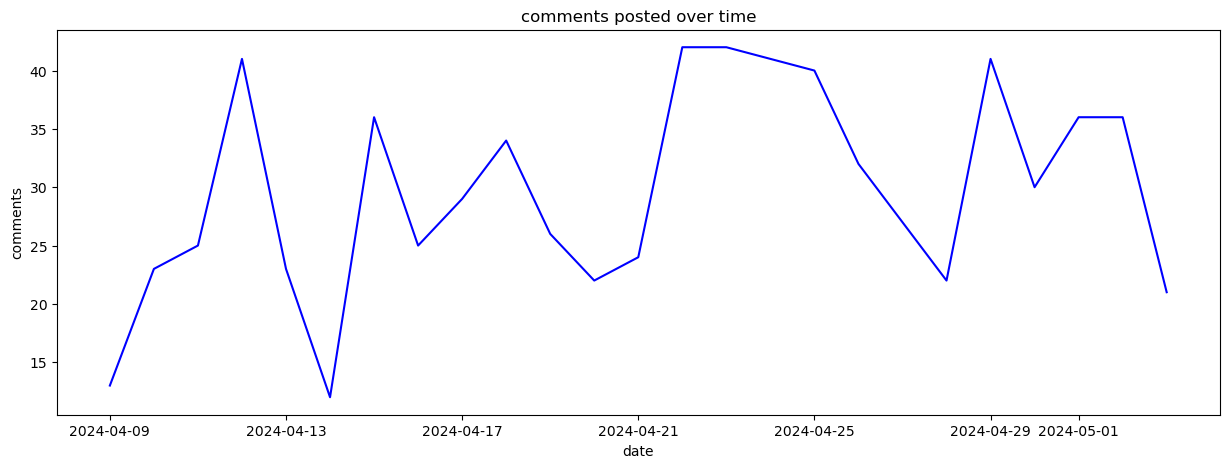

In [655]:
df_title.groupby(df_title["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))

In [656]:
df_title['cleaned_title'] = df_title['title'].apply(lambda x: preprocessing_text(x))
df_title['cleaned_title'] = df_title['cleaned_title'].apply(lambda x: word_stemmer(x))
df_title['cleaned_title'] = df_title['cleaned_title'].apply(lambda x: stop_words(x))
df_title

title comment_created_utc  \
0      General Questions and Purchasing Advice Thread... 2024-05-01 17:01:03   
98     Electric car driver turned away from hospital ... 2024-05-03 16:03:38   
308                         Interesting email from Tesla 2024-05-03 21:15:03   
454    Hyundai IONIQ 9 three-row EV set for debut fol... 2024-05-03 17:25:54   
507    Swedish electric car battery start-up Northvol... 2024-05-03 15:37:42   
...                                                  ...                 ...   
55095             Smart Needs Help To Make New ForTwo EV 2024-04-09 23:29:32   
55098                      Should I Get An Electric Car? 2024-04-11 14:09:14   
55107          Hardcore Hyundai Ioniq 6 N is out testing 2024-04-09 11:46:34   
55187                                           Charging 2024-04-10 12:49:24   
55212  Hyundai US boss calls out the competition as t... 2024-04-09 02:21:16   

                                           cleaned_title  
0      general question purchase advice thread week a...  
98     car driver turn away hospital car park tell ca...  
308                                 interest email tesla  
454       hyundai ioniq three row set debut follow sight  
507        swedish car battery start northvolt get start  
...                                                  ...  
55095                    smart need help make new fortwo  
55098                                            get car  
55107                        hardcore hyundai ioniq test  
55187                                             charge  
55212             hyundai boss call competition brand go  

[743 rows x 3 columns]

In [657]:
title_combined =''
for each in df_title['cleaned_title']:
    title_combined = title_combined + " " + each
print(title_combined)

 general question purchase advice thread week april car driver turn away hospital car park tell car could explode interest email tesla hyundai ioniq three row set debut follow sight swedish car battery start northvolt get start tesla supercharger roll halt australia quality go deteriorate lay tesla employee supercharger future rivian receive illinois state funding expand normal il facility happen tesla expert think elon musk shock firing supercharger team spark broad fear future industry tesla yield charge crown driver without driveway charge cadillac walk back commitment sell gas car past india tata nexon simple affordable solution complex problem insideevs sport car lotus make behind scene sc revel talk snap defunct tesla charge site china launch world large container ship mwh battery ford april sale mach yoy lightning yoy transit yoy porsche cayenne shed camo still hide plenty detail costco auto offer thousand new volvo chevy polestar july st electrify america substantial usage grow

In [658]:
len(title_combined)

30871

In [659]:
# !pip install spacy 
# ! python -m spacy download en_core_web_sm

In [225]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [396]:
# for each in df_title['cleaned_title']:
#     print(each)
#     doc = nlp(each)
#     for ent in doc.ents:
#         print(ent.text, ent.start_char, ent.end_char, ent.label_)
#     print("-----------------")
# #     break

In [660]:
doc = nlp(title_combined)

In [661]:
df_ner = pd.DataFrame(columns=['Text','Label'])

for ent in doc.ents:
    df_ner.loc[len(df_ner)]  = [ent.text, ent.label_]
#     break
df_ner.head()

Text     Label
0  week april      DATE
1     hyundai       ORG
2       ioniq       GPE
3       three  CARDINAL
4     swedish      NORP

In [662]:
df_ner['Label'].unique()

array(['DATE', 'ORG', 'GPE', 'CARDINAL', 'NORP', 'PERSON', 'ORDINAL',
       'PRODUCT', 'LOC', 'TIME', 'EVENT', 'LAW', 'QUANTITY', 'LANGUAGE',
       'FAC', 'MONEY'], dtype=object)

In [663]:
xorg = df_ner[df_ner['Label'] =='ORG']
xorg['Text'].value_counts()[:10]

hyundai       15
gm            13
kia           12
ford          11
cadillac       7
volkswagen     6
toyota         4
nissan         4
lotus          3
mazda          2
Name: Text, dtype: int64

In [664]:

for each in df_ner['Label'].unique():
    print(each)
    xorg = df_ner[df_ner['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

DATE
today            5
week april       3
april            3
every week       2
year             2
day              2
first quarter    2
spring           2
quarterly        2
annually         1
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORG
hyundai       15
gm            13
kia           12
ford          11
cadillac       7
volkswagen     6
toyota         4
nissan         4
lotus          3
mazda          2
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
GPE
china         29
america        9
california     5
beijing        5
canada         4
australia      2
ohio           2
france         2
japan          2
italy          2
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
CARDINAL
one         8
two         7
three       4
million     3
billion     3


In [665]:
df_ner.groupby('Label').count()

Text
Label         
CARDINAL    34
DATE        49
EVENT        2
FAC          1
GPE         85
LANGUAGE     1
LAW          2
LOC         20
MONEY        1
NORP        46
ORDINAL     23
ORG        129
PERSON      59
PRODUCT      3
QUANTITY     3
TIME         2

In [666]:
xdf = pd.DataFrame(df_ner[df_ner['Label'] =='ORG']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
xdf

ORG  frequency
0     hyundai         15
1          gm         13
2         kia         12
3        ford         11
4    cadillac          7
5  volkswagen          6
6      toyota          4
7      nissan          4
8       lotus          3
9       mazda          2

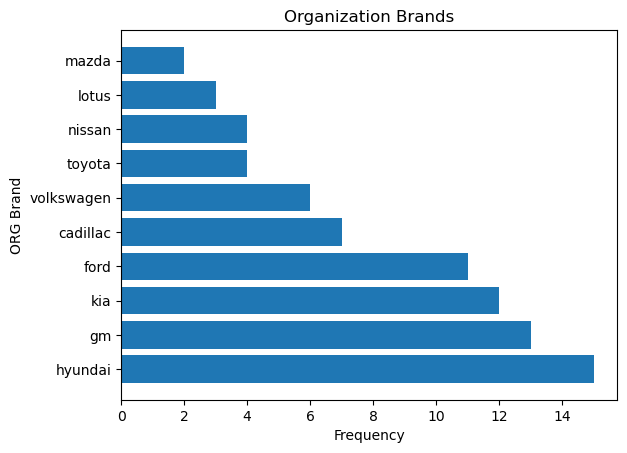

In [667]:
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("ORG Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("Organization Brands")
plt.show()

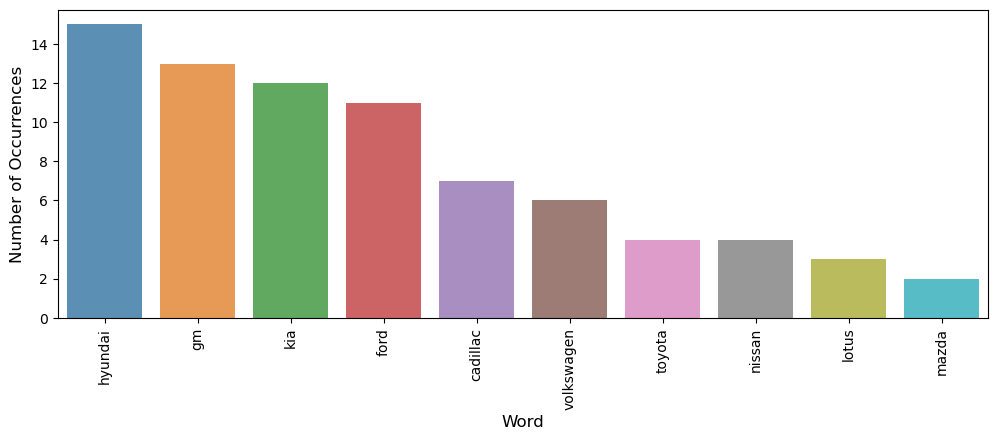

In [405]:

plt.figure(figsize=(12,4))
sns.barplot(data=xdf, x='ORG', y='frequency', alpha=0.8) #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [406]:
# !pip install pytextrank

In [270]:

import spacy
import pytextrank
 
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")

In [276]:
doc = nlp(title_combined)
 
for sent in doc._.textrank.summary(limit_phrases=5, limit_sentences=5):
    print(sent)
    print('Summary Length:',len(sent))

company sign ndas diligence might gm driver get line nacs adapter new byd seagull come europe charge top floor flat app apocalypse currently live charge get well naturally networks build even without tap pay autocharge chevy remove cheap lt trim equinox configurator people ny use public charging chargepoint risk happen go bankrupt support spot beijing three overtakes one lap silverstone mcmurtry sp irling pure fan car power downforce tesla autopilot sense motorcycle apparently besides tesla car available nacs today without adaptor last mile ev delivery truck dream hit snag byd ev export sell twice china price reuters nema amp breaker awg wiring ev winter drive question awd fwd car worth much without battery warranty drive lot ev bad idea chinese investment boost hungary ev battery capacity toyota pilot ev pickup pattaya polestar go sale start insideevs formula fia unveil gen evo race car capable mph top gear review alpha motor wolf tg drive truck next charge outlet could improve ev eff

In [409]:
df_ner.groupby('Label').sum()

Text
Label                                                      
CARDINAL  threethousandhundredtwomilliononetwozeroonemil...
DATE      week aprilaprilyear endaprilyear yearapril fir...
EVENT                                   vietnamioniq en cup
FAC                                       marina oslo break
GPE       ioniqindiachinacaliforniacaliforniaamericachin...
LANGUAGE                                            english
LAW                    prologue acura zdx evolutionepa mile
LOC       europe acura zdxbay areamount teslaeuropenorth...
MONEY                                           nearly cent
NORP      swedishkoreankwhchinesechinesejapaneseamerican...
ORDINAL   firstfirstfirstfirstfirstfirstfirstfirstfirstf...
ORG       hyundaiillinois statecadillaclotusfordcamovolv...
PERSON    machstrap fiskerferrari porschejourniecybertru...
PRODUCT                                       optiqbmwoptiq
QUANTITY                last milekilometer milesmuggle mile
TIME                                            hourmorning

In [410]:
# nltk.download('all')

In [ ]:
# doc = nlp(title_combined)
# for ent in doc.ents:
#     print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [668]:

word_counter = Counter()
for row in df_title.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf = pd.DataFrame(word_counter.most_common())
df_tf.columns = ["term", "frequency"]
df_tf

term  frequency
0          charge        102
1           tesla         97
2             car         84
3         battery         59
4             new         53
...           ...        ...
1853       fortwo          1
1854     hardcore          1
1855         boss          1
1856         call          1
1857  competition          1

[1858 rows x 2 columns]

In [412]:
import matplotlib.pyplot as plt
import seaborn as sns

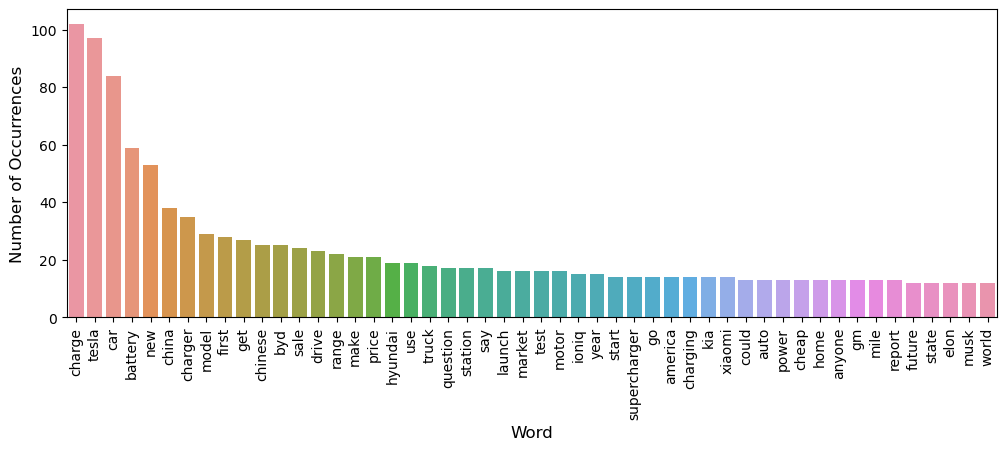

In [669]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf[:50], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [670]:

cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.save("wordcloud.png")

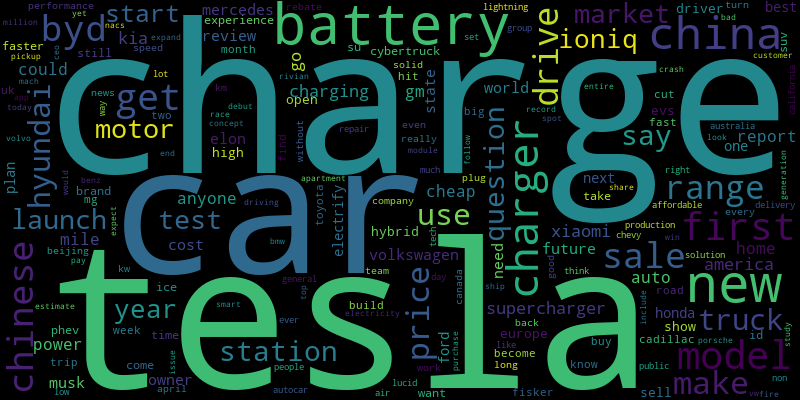

In [671]:
image

In [672]:
documents = [comment.split() for comment in df_title['cleaned_title']] #tokenizing_the_words
documents

[['general', 'question', 'purchase', 'advice', 'thread', 'week', 'april'],
 ['car',
  'driver',
  'turn',
  'away',
  'hospital',
  'car',
  'park',
  'tell',
  'car',
  'could',
  'explode'],
 ['interest', 'email', 'tesla'],
 ['hyundai', 'ioniq', 'three', 'row', 'set', 'debut', 'follow', 'sight'],
 ['swedish', 'car', 'battery', 'start', 'northvolt', 'get', 'start'],
 ['tesla', 'supercharger', 'roll', 'halt', 'australia'],
 ['quality',
  'go',
  'deteriorate',
  'lay',
  'tesla',
  'employee',
  'supercharger',
  'future'],
 ['rivian',
  'receive',
  'illinois',
  'state',
  'funding',
  'expand',
  'normal',
  'il',
  'facility'],
 ['happen', 'tesla', 'expert', 'think'],
 ['elon',
  'musk',
  'shock',
  'firing',
  'supercharger',
  'team',
  'spark',
  'broad',
  'fear',
  'future',
  'industry',
  'tesla',
  'yield',
  'charge',
  'crown'],
 ['driver', 'without', 'driveway', 'charge'],
 ['cadillac', 'walk', 'back', 'commitment', 'sell', 'gas', 'car', 'past'],
 ['india',
  'tata',
  

In [673]:
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.023*"new" + 0.019*"tesla" + 0.011*"chinese" + 0.010*"car" + 0.009*"say" + '
  '0.008*"byd" + 0.007*"fisker" + 0.007*"battery" + 0.007*"sale" + '
  '0.007*"trip"'),
 (1,
  '0.019*"charge" + 0.019*"car" + 0.014*"tesla" + 0.011*"ioniq" + 0.008*"go" + '
  '0.008*"battery" + 0.007*"future" + 0.007*"new" + 0.007*"china" + '
  '0.007*"range"'),
 (2,
  '0.024*"tesla" + 0.023*"charge" + 0.011*"battery" + 0.009*"charger" + '
  '0.008*"use" + 0.008*"china" + 0.006*"still" + 0.006*"supercharger" + '
  '0.006*"future" + 0.005*"month"'),
 (3,
  '0.015*"car" + 0.012*"new" + 0.012*"tesla" + 0.012*"battery" + '
  '0.011*"charging" + 0.010*"first" + 0.008*"charge" + 0.007*"week" + '
  '0.007*"experience" + 0.007*"hyundai"'),
 (4,
  '0.024*"charge" + 0.013*"charger" + 0.010*"battery" + 0.010*"range" + '
  '0.010*"year" + 0.010*"china" + 0.008*"motor" + 0.007*"first" + 0.006*"cost" '
  '+ 0.005*"tesla"'),
 (5,
  '0.028*"tesla" + 0.023*"charge" + 0.014*"new" + 0.011*"battery" + '
  '0.009*"car" +

In [674]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_title"]
    return sia.polarity_scores(text)["compound"]

df_title["vader_sentiment"] = df_title.apply(score_vader, axis=1)

In [675]:
df_title

title comment_created_utc  \
0      General Questions and Purchasing Advice Thread... 2024-05-01 17:01:03   
98     Electric car driver turned away from hospital ... 2024-05-03 16:03:38   
308                         Interesting email from Tesla 2024-05-03 21:15:03   
454    Hyundai IONIQ 9 three-row EV set for debut fol... 2024-05-03 17:25:54   
507    Swedish electric car battery start-up Northvol... 2024-05-03 15:37:42   
...                                                  ...                 ...   
55095             Smart Needs Help To Make New ForTwo EV 2024-04-09 23:29:32   
55098                      Should I Get An Electric Car? 2024-04-11 14:09:14   
55107          Hardcore Hyundai Ioniq 6 N is out testing 2024-04-09 11:46:34   
55187                                           Charging 2024-04-10 12:49:24   
55212  Hyundai US boss calls out the competition as t... 2024-04-09 02:21:16   

                                           cleaned_title  vader_sentiment  
0      general question purchase advice thread week a...           0.0000  
98     car driver turn away hospital car park tell ca...           0.0000  
308                                 interest email tesla           0.4588  
454       hyundai ioniq three row set debut follow sight           0.0000  
507        swedish car battery start northvolt get start           0.0000  
...                                                  ...              ...  
55095                    smart need help make new fortwo           0.6597  
55098                                            get car           0.0000  
55107                        hardcore hyundai ioniq test           0.0000  
55187                                             charge           0.0000  
55212             hyundai boss call competition brand go           0.0000  

[743 rows x 4 columns]

<Axes: title={'center': 'Pages for Electric Vehicle Topics'}, ylabel='Frequency'>

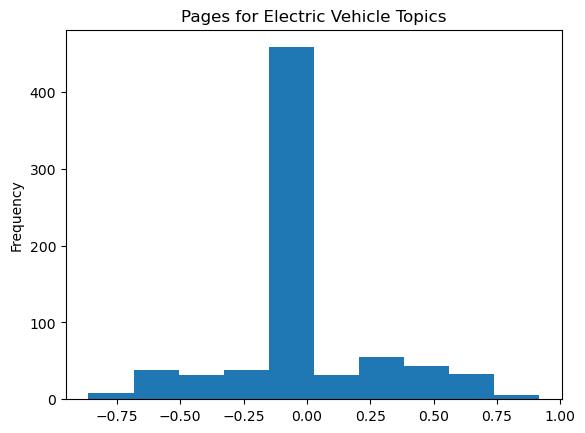

In [804]:
df_title["vader_sentiment"].plot(kind="hist",title= "Pages for Electric Vehicle Topics")

In [805]:
print("Positive Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] > 0])))
print("Neutral Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] == 0])))
print("Negative Pages for Electric Vehicle Topics Count - " + str(len(df_title[df_title['vader_sentiment'] < 0])))

Positive Pages for Electric Vehicle Topics Count - 174
Neutral Pages for Electric Vehicle Topics Count - 430
Negative Pages for Electric Vehicle Topics Count - 139


In [678]:
def get_top_n_bigram(corpus, n=None, grams = 2):
    vec = CountVectorizer(ngram_range=(grams, grams), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [679]:
get_top_n_bigram(df_title['cleaned_title'], 20)

[('elon musk', 9),
 ('charge station', 9),
 ('electrify america', 8),
 ('hyundai ioniq', 6),
 ('fast charge', 6),
 ('xiaomi su', 6),
 ('tesla model', 6),
 ('solid state', 6),
 ('state battery', 6),
 ('tesla cybertruck', 5),
 ('mercedes benz', 5),
 ('tesla car', 5),
 ('tesla supercharger', 4),
 ('chinese car', 4),
 ('acura zdx', 4),
 ('mile range', 4),
 ('beijing auto', 4),
 ('north america', 4),
 ('non tesla', 4),
 ('ice car', 4)]

elon musk 9
charge station 9
electrify america 8
hyundai ioniq 6
fast charge 6
xiaomi su 6
tesla model 6
solid state 6
state battery 6
tesla cybertruck 5
mercedes benz 5
tesla car 5
tesla supercharger 4
chinese car 4
acura zdx 4
mile range 4
beijing auto 4
north america 4
non tesla 4
ice car 4


<Axes: title={'center': 'Common Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

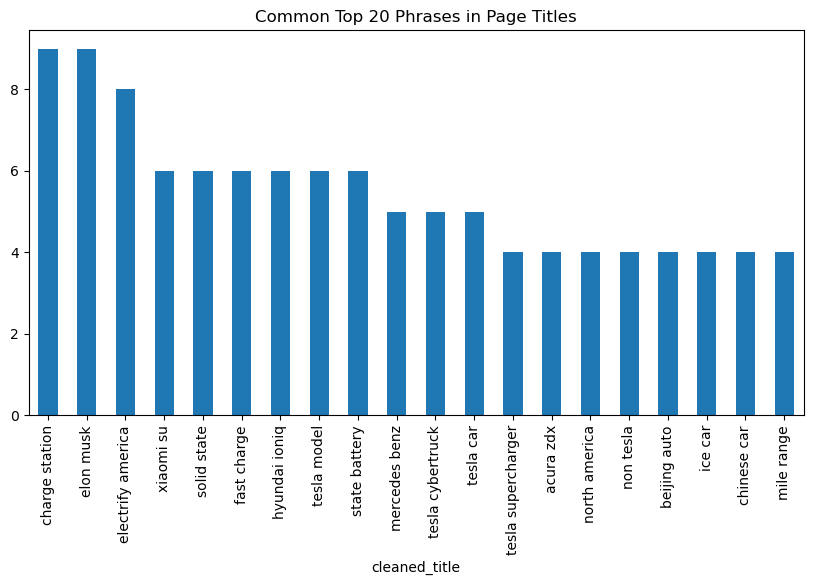

In [810]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Common Top 20 Phrases in Page Titles')


solid state battery 6
general question purchase 3
question purchase advice 3
purchase advice thread 3
advice thread week 3
thread week april 3
fast charge station 3
entire supercharger team 2
plug hybrid battery 2
charge station gas 2
station gas station 2
tesla model performance 2
model performance review 2
electrify america charge 2
america charge station 2
elon musk say 2
charge faster test 2
baojun yep plus 2
car driver turn 1
driver turn away 1


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_title'>

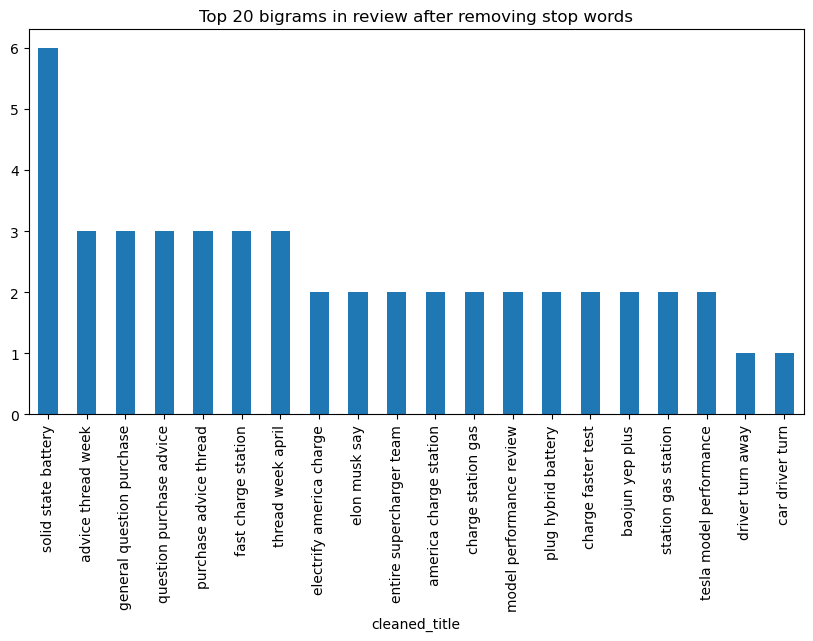

In [681]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


general question purchase advice 3
question purchase advice thread 3
purchase advice thread week 3
advice thread week april 3
fast charge station gas 2
charge station gas station 2
tesla model performance review 2
electrify america charge station 2
car driver turn away 1
driver turn away hospital 1
turn away hospital car 1
away hospital car park 1
hospital car park tell 1
car park tell car 1
park tell car explode 1
hyundai ioniq row set 1
ioniq row set debut 1
row set debut follow 1
set debut follow sight 1
swedish car battery start 1


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_title'>

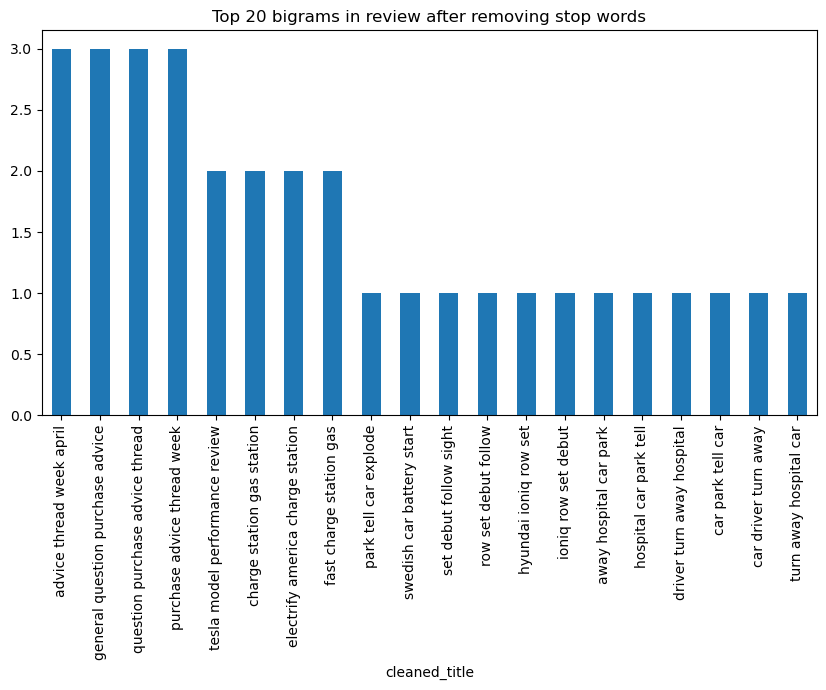

In [682]:

common_words = get_top_n_bigram(df_title['cleaned_title'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


In [684]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] > 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_pos = pd.DataFrame(word_counter.most_common())
df_tf_pos.columns = ["term", "frequency"]
df_tf_pos

term  frequency
0       charge         25
1          car         24
2          new         20
3      battery         15
4        tesla         12
..         ...        ...
737      flood          1
738       auto          1
739   treasury          1
740  secretary          1
741     fortwo          1

[742 rows x 2 columns]

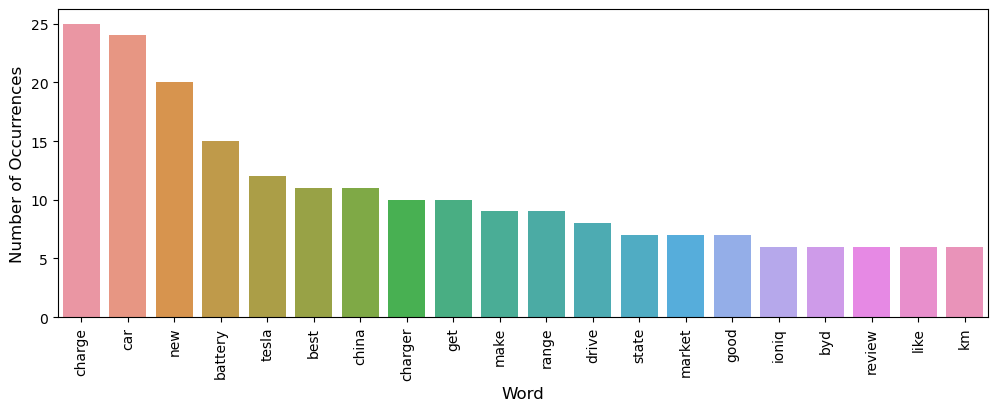

In [685]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_pos[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

solid state battery 5
baojun yep plus 2
rivian receive illinois 1
receive illinois state 1
illinois state funding 1
state funding expand 1
funding expand normal 1
expand normal il 1
normal il facility 1
cadillac walk commitment 1
walk commitment sell 1
commitment sell gas 1
sell gas car 1
gas car past 1
electrify america substantial 1
america substantial usage 1
substantial usage growth 1
usage growth plan 1
growth plan expand 1
plan expand network 1


<Axes: title={'center': 'Positive Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

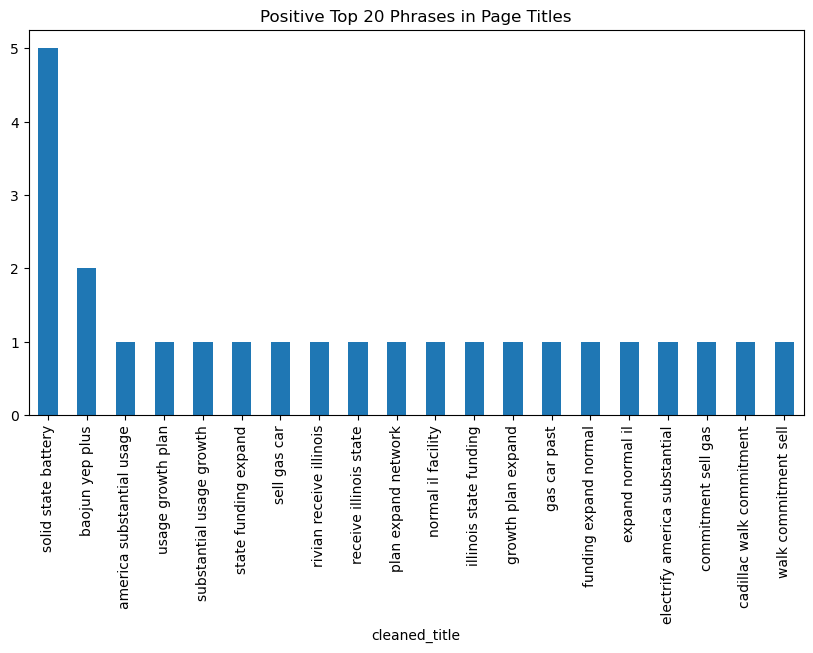

In [809]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] > 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Positive Top 20 Phrases in Page Titles')


general question purchase 3
question purchase advice 3
purchase advice thread 3
advice thread week 3
thread week april 3
fast charge station 3
plug hybrid battery 2
charge station gas 2
station gas station 2
tesla model performance 2
model performance review 2
electrify america charge 2
america charge station 2
charge faster test 2
car driver turn 1
driver turn away 1
turn away hospital 1
away hospital car 1
hospital car park 1
car park tell 1


<Axes: title={'center': 'Neutral Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

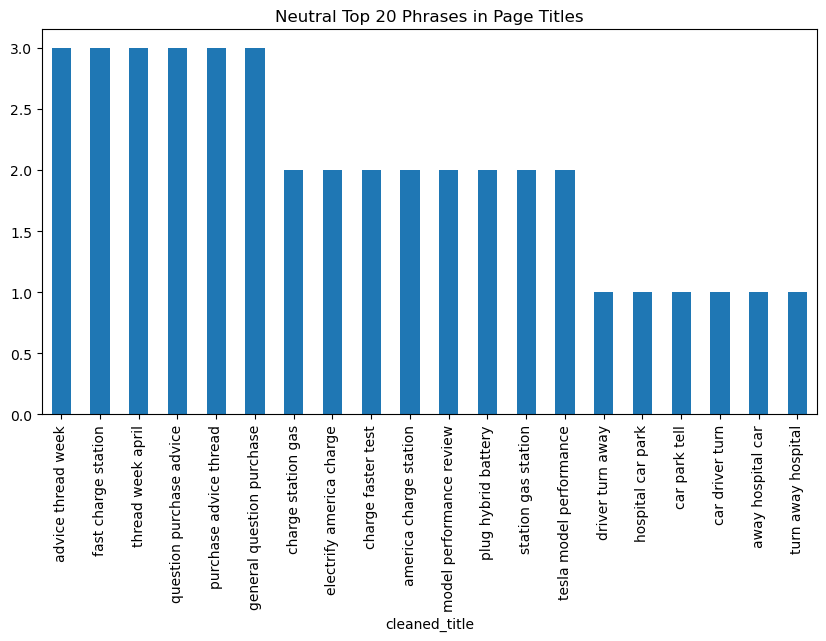

In [807]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] == 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Neutral Top 20 Phrases in Page Titles')


elon musk shock 1
musk shock firing 1
shock firing supercharger 1
firing supercharger team 1
supercharger team spark 1
team spark broad 1
spark broad fear 1
broad fear future 1
fear future industry 1
future industry tesla 1
industry tesla yield 1
tesla yield charge 1
yield charge crown 1
india tata nexon 1
tata nexon simple 1
nexon simple affordable 1
simple affordable solution 1
affordable solution complex 1
solution complex problem 1
complex problem insideevs 1


<Axes: title={'center': 'Negative Top 20 Phrases in Page Titles'}, xlabel='cleaned_title'>

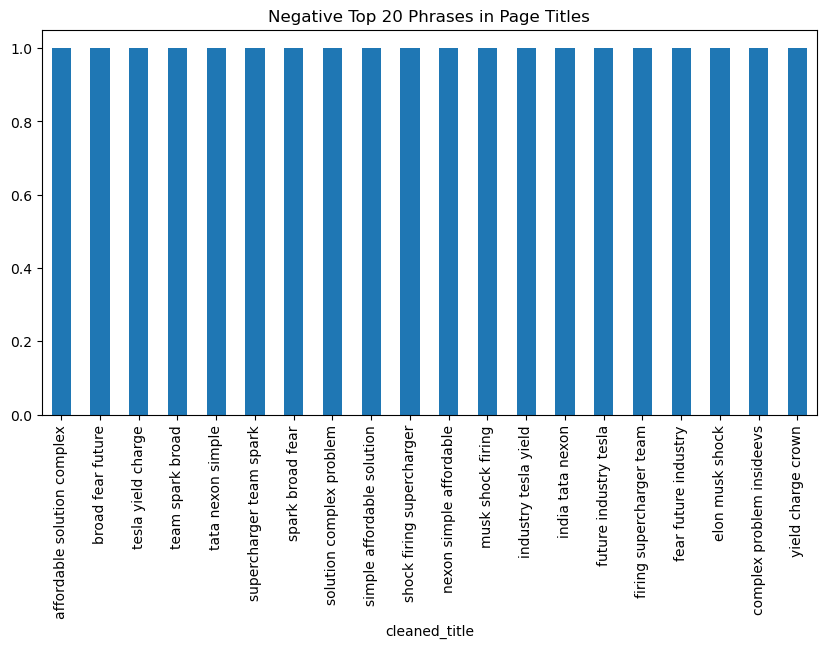

In [808]:

common_words = get_top_n_bigram(df_title[df_title['vader_sentiment'] < 0]['cleaned_title'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_title' , 'count'])
df4.groupby('cleaned_title').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Negative Top 20 Phrases in Page Titles')


In [689]:
reindexed_data = df_title['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
# reindexed_data

In [456]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [690]:
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_model

TruncatedSVD(n_components=6)

In [691]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [692]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [693]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [466]:
import numpy as np

In [694]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  charge station owner
Topic 2:  tesla model price
Topic 3:  car new chinese
Topic 4:  battery china range
Topic 5:  charger issue home
Topic 6:  use battery knee


In [695]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] == 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_nut = pd.DataFrame(word_counter.most_common())
df_tf_nut.columns = ["term", "frequency"]
df_tf_nut

term  frequency
0          charge         62
1           tesla         60
2             car         43
3         battery         32
4             new         30
...           ...        ...
1125  application          1
1126     hardcore          1
1127         boss          1
1128         call          1
1129  competition          1

[1130 rows x 2 columns]

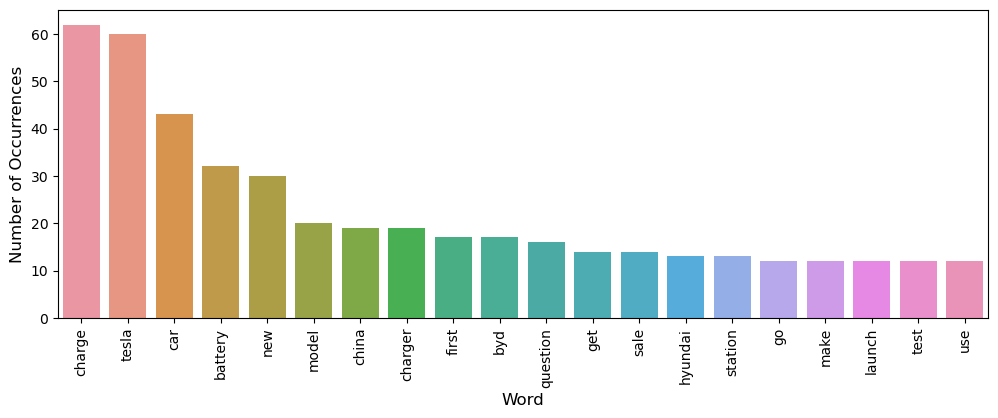

In [696]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_nut[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [697]:
word_counter = Counter()
for row in df_title[df_title['vader_sentiment'] < 0].to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_title"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_neg = pd.DataFrame(word_counter.most_common())
df_tf_neg.columns = ["term", "frequency"]
df_tf_neg

term  frequency
0       tesla         25
1         car         17
2      charge         15
3       price         14
4         kia         13
..        ...        ...
634   lithium          1
635       ion          1
636   million          1
637    strike          1
638  lifetime          1

[639 rows x 2 columns]

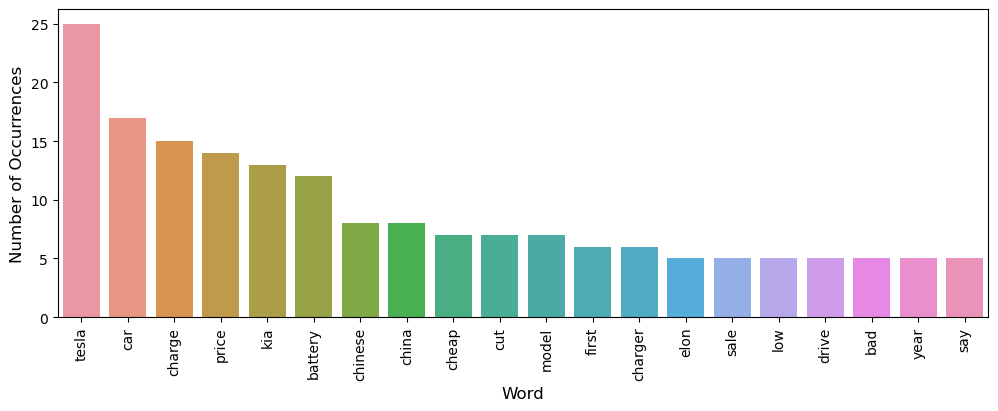

In [698]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_neg[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Topic 1:  charge station owner
Topic 2:  tesla supercharger elon
Topic 3:  car new ioniq
Topic 4:  battery range mile
Topic 5:  charger issue best
Topic 6:  use charging knee
Topic 7:  sale china market
Topic 8:  chinese cheap beijing
Topic 9:  question motor general
Topic 10:  model price park


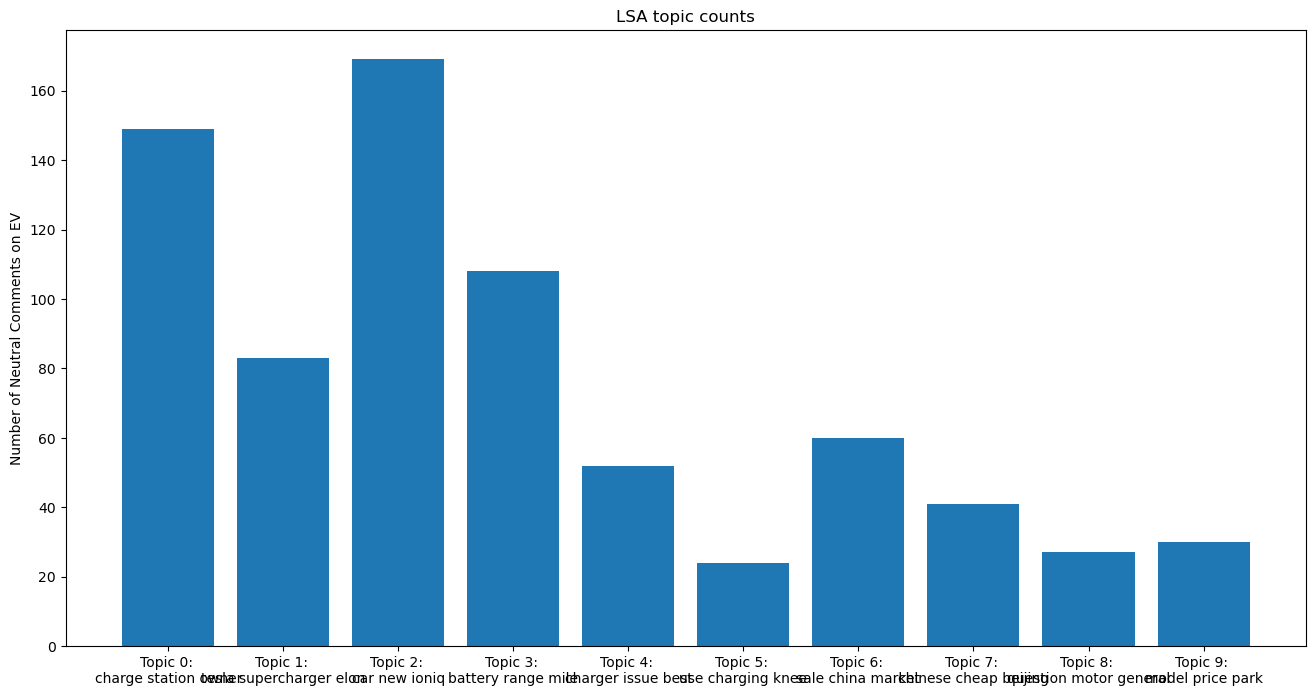

In [798]:
reindexed_data = df_title['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  charge station question
Topic 2:  tesla supercharger cybertruck
Topic 3:  car chinese new
Topic 4:  battery range launch
Topic 5:  charger issue home
Topic 6:  question purchase general
Topic 7:  battery use bev
Topic 8:  sale china europe
Topic 9:  hyundai ioniq test
Topic 10:  model make station


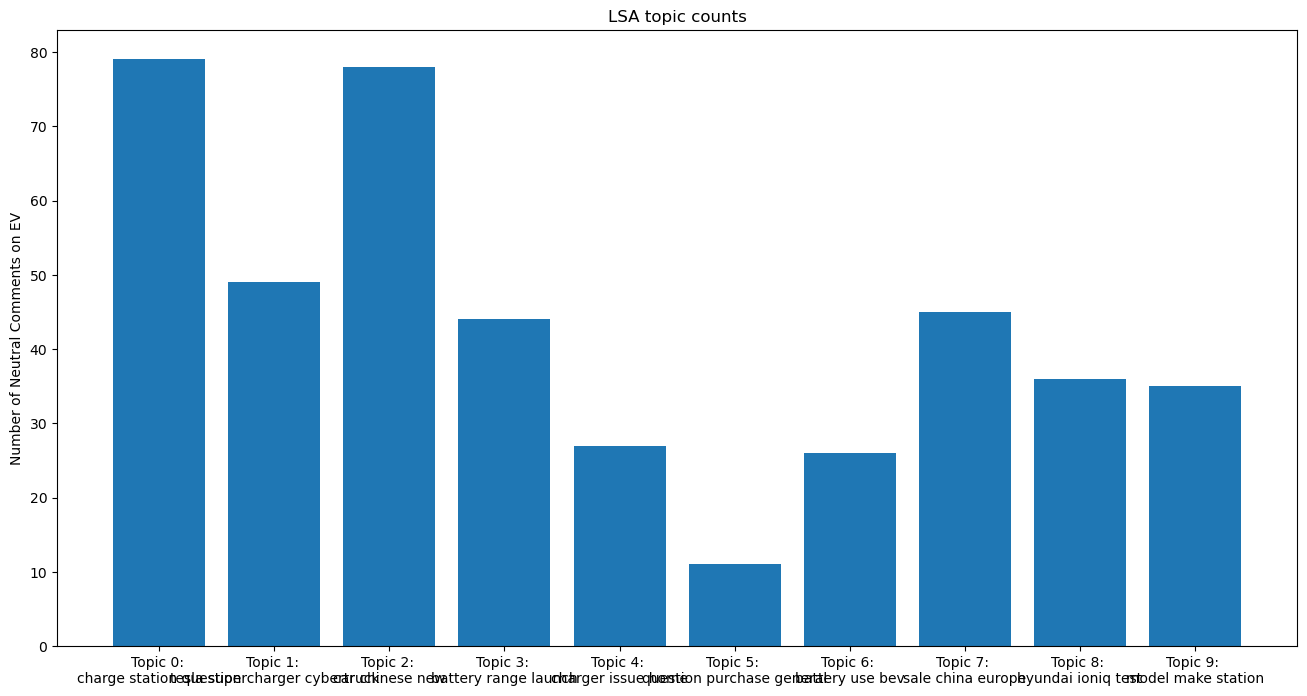

In [799]:
reindexed_data = df_title[df_title['vader_sentiment'] == 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  charge new car
Topic 2:  battery state solid
Topic 3:  best drive way
Topic 4:  ex delete mod
Topic 5:  tesla share want
Topic 6:  experience market use
Topic 7:  review drive alpha
Topic 8:  car incentive efficient
Topic 9:  bz toyota ethical
Topic 10:  good concept bmw


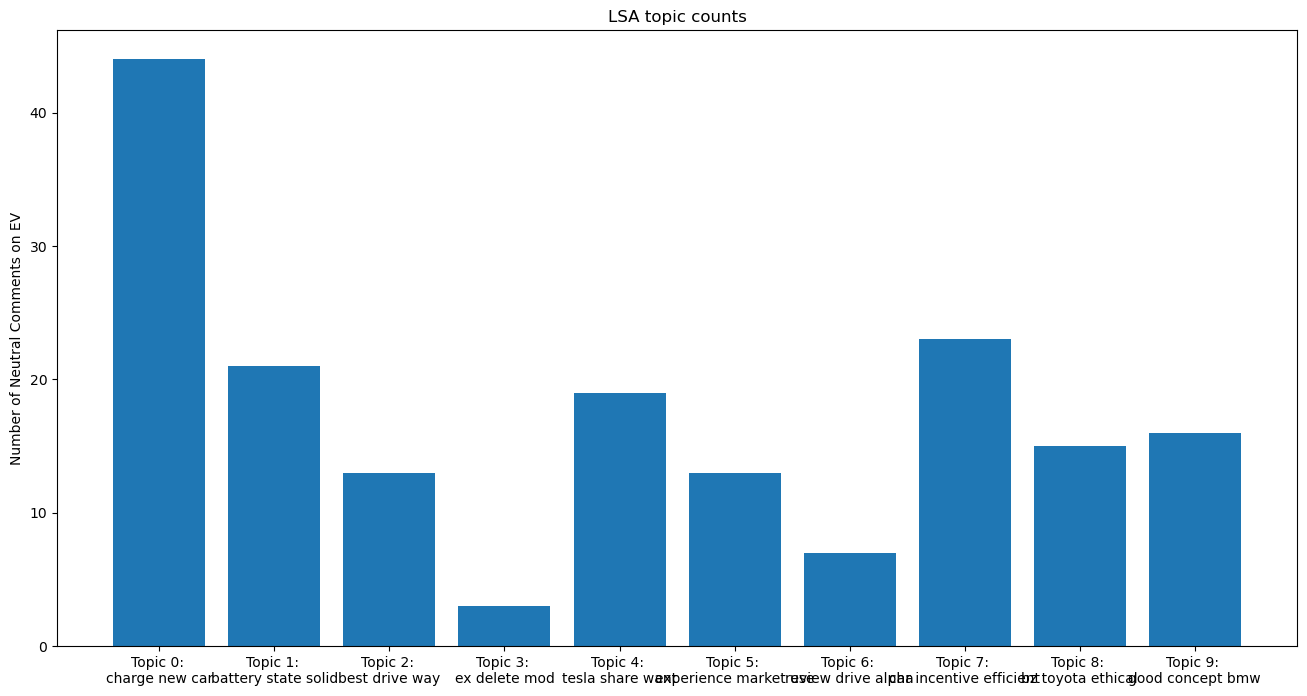

In [801]:
reindexed_data = df_title[df_title['vader_sentiment'] > 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  tesla price cut
Topic 2:  charge kia charger
Topic 3:  model year kia
Topic 4:  battery chinese car
Topic 5:  china planner route
Topic 6:  cheap dirt campaign
Topic 7:  car repair leave
Topic 8:  knee pain exactly
Topic 9:  loss evs ford
Topic 10:  hard tire fud


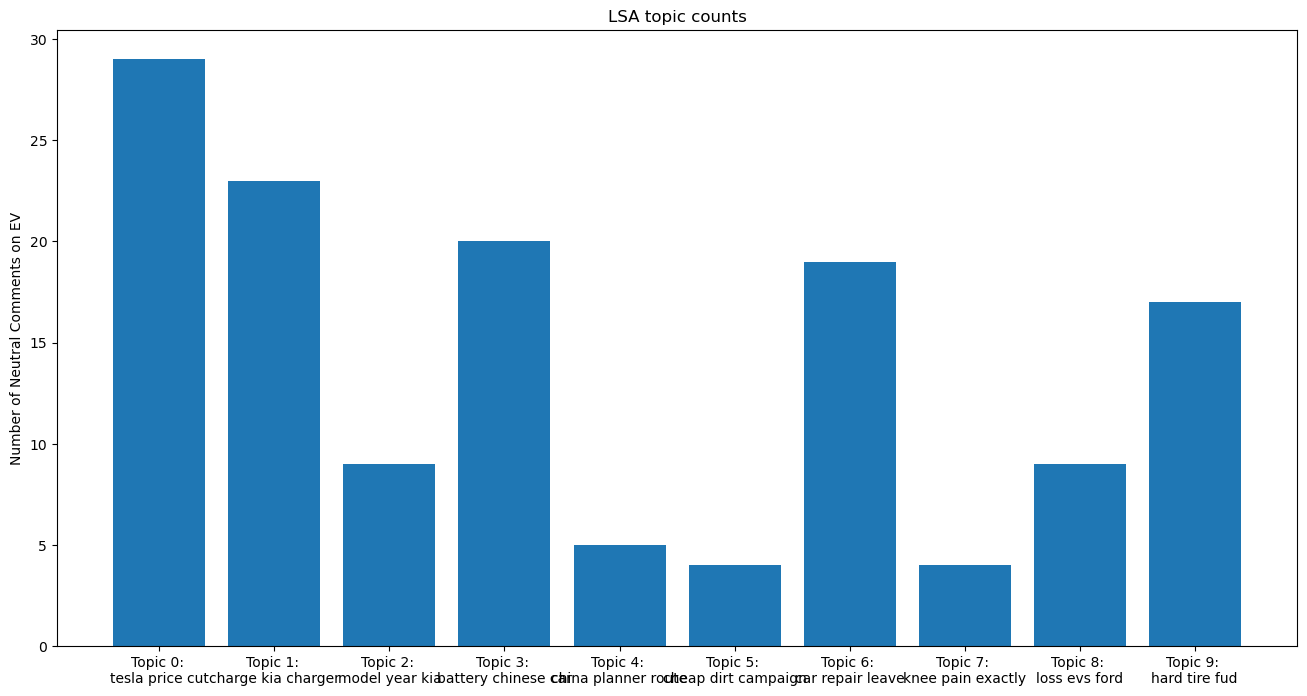

In [803]:
reindexed_data = df_title[df_title['vader_sentiment'] < 0]['cleaned_title']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

# Question

In [705]:
df[(df['comment_parent_id'] == 't3_1ci053f')]['comment_body']

2742    >Two sources told *Electrek* that Tinucci was ...
2743    > Now, Electrek has learned that Musk also gut...
2744    IMO the biggest news is this:\n\n> Two sources...
2745    I thought this article had a lot of insights. ...
2746    I interviewed for their product engineer role ...
                              ...                        
2809              Do what the boss says. Not a democracy.
2810    Elon is definitely an ass as well as many othe...
2811    He is the Boss, thats what Bosses do. \n\nWith...
2812    In this thread: a bunch of internet commentato...
2813    When Elon is actively running Tesla, the stock...
Name: comment_body, Length: 72, dtype: object

In [706]:
rowno = 2742
print(df[(df['comment_parent_id'] == 't3_1ci053f')]['comment_body'][rowno])
preprocessing_text(df[(df['comment_parent_id'] == 't3_1ci053f')]['comment_body'][rowno])

>Two sources told *Electrek* that Tinucci was fighting back pressure from Musk to fire a bigger percentage of her team, and the CEO decided to let go of the entire team as an example.


' two sources told  electrek  that tinucci was fighting back pressure from musk to fire a bigger percentage of her team  and the ceo decided to let go of the entire team as an example '

In [707]:
df_question = df[df['Type'] == 'Question'][['comment_body','comment_created_utc']]
df_question.head()

comment_body comment_created_utc
0  In looking at the recent news about Hertz sell... 2024-05-01 17:01:03
1  I’m looking between two vehicles. Both are the... 2024-05-02 04:37:45
2  I’m looking to get my first EV to help with th... 2024-05-02 14:46:22
3  Help with Mass EV Rebat (MOR-EV Trucks)  \n  \... 2024-05-02 19:22:28
4  2016 egolf vs 2021 dacia spring\n\nHello every... 2024-05-03 08:27:24

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

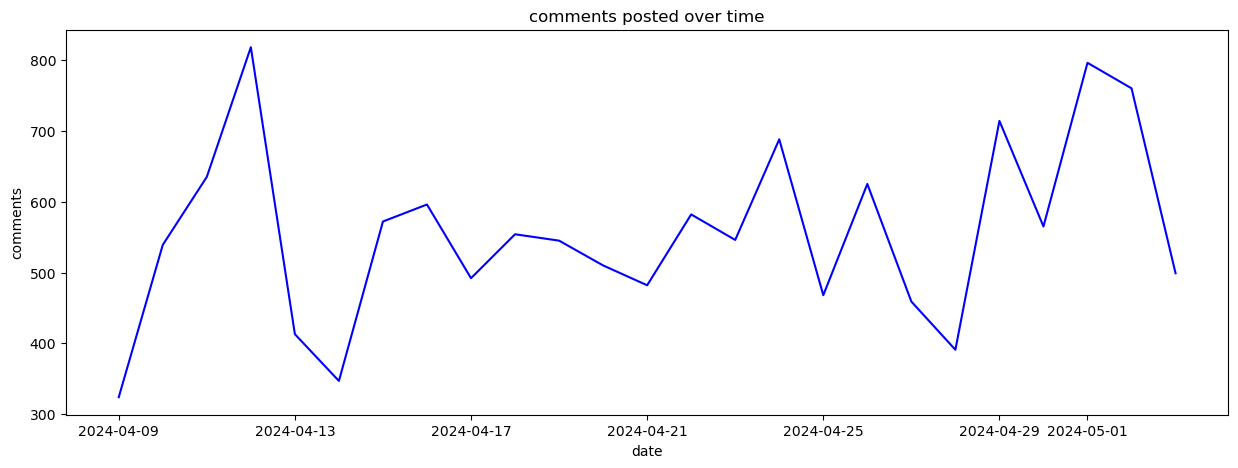

In [708]:
df_question.groupby(df_question["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))

In [709]:
df_question['cleaned_question'] = df_question['comment_body'].apply(lambda x: preprocessing_text(x))
df_question['cleaned_question'] = df_question['cleaned_question'].apply(lambda x: word_stemmer(x))
df_question['cleaned_question'] = df_question['cleaned_question'].apply(lambda x: stop_words(x))
df_question.head()

comment_body comment_created_utc  \
0  In looking at the recent news about Hertz sell... 2024-05-01 17:01:03   
1  I’m looking between two vehicles. Both are the... 2024-05-02 04:37:45   
2  I’m looking to get my first EV to help with th... 2024-05-02 14:46:22   
3  Help with Mass EV Rebat (MOR-EV Trucks)  \n  \... 2024-05-02 19:22:28   
4  2016 egolf vs 2021 dacia spring\n\nHello every... 2024-05-03 08:27:24   

                                    cleaned_question  
0  look recent news hertz selling aware problem c...  
1  look two kia niro ex mile dark blue tesla mode...  
2  look get first help cost daily commute current...  
3  help mass rebat mor truck buy new lightning po...  
4  egolf dacia spring hello everyone ive check ne...

In [710]:
print(len(df_question))
df_question.drop_duplicates('cleaned_question',inplace=True)
print(len(df_question))

13920
13609


In [711]:
question_combined =''
for each in df_question['cleaned_question']:
    question_combined = question_combined + " " + each
print(question_combined)

 look recent news hertz selling aware problem charge battery badly wonder way quickly check health tesla model battery eta nm find answer online look two kia niro ex mile dark blue tesla model long range mile red like hatch back unfortunately technically neither hot hatch model one price exist yet golf range uncomfortable commute mile daily almost every day live duplex currently drive plug prius charge home usually passenger half week huge fan niros charger location nose heard teslas get high insurance like tesla well sound system use smartphone key dislike lack apple carplay preferred map apple know know hard find fact niro heat pump tesla tesla longer warranty mile year mile best deal local car com edmunds look get first help cost daily commute currently drive mid size truck mile daily gas kill go get level charger instal buy tax credit look niro bolt euv lean towards bolt notice model available price range mile go put lot mile worry old model last long reliability longevity main con

In [712]:
doc = nlp(question_combined[:1000000])

df_ner_ques = pd.DataFrame(columns=['Text','Label'])

for ent in doc.ents:
    df_ner_ques.loc[len(df_ner_ques)]  = [ent.text, ent.label_]
#     break
df_ner_ques.head()

Text     Label
0        two  CARDINAL
1        kia       ORG
2        one  CARDINAL
3      daily      DATE
4  half week      DATE

In [713]:

# for each in df_ner_ques['Label'].unique():
#     print(each)
#     xorg = df_ner_ques[df_ner_ques['Label'] ==each]
#     print(xorg['Text'].value_counts()[:10])
#     print("-----"*20)

In [714]:
doc = nlp(question_combined[1000000:2000000])

for ent in doc.ents:
    df_ner_ques.loc[len(df_ner_ques)]  = [ent.text, ent.label_]
#     break
df_ner_ques.head()

Text     Label
0        two  CARDINAL
1        kia       ORG
2        one  CARDINAL
3      daily      DATE
4  half week      DATE

In [715]:

for each in df_ner_ques['Label'].unique():
    print(each)
    xorg = df_ner_ques[df_ner_ques['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

CARDINAL
one        1314
two         344
zero        125
half        119
three        83
billion      62
million      58
gallon       47
four         27
dozen        20
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORG
ford        299
gm          226
kia         200
toyota      180
hyundai     119
nissan       88
epa          82
cadillac     64
tesla        44
bmw          38
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
DATE
year         369
daily        177
today        170
month        148
winter       127
last year    119
next year     85
day           74
year ago      62
week          61
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORDINAL
first        424
second       195
third         59
fourth         7
tenth          2
firstly        2
fift

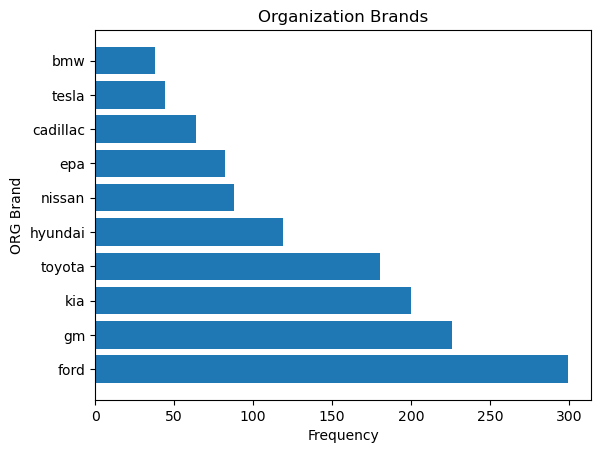

In [716]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='ORG']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("ORG Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("Organization Brands")
plt.show()

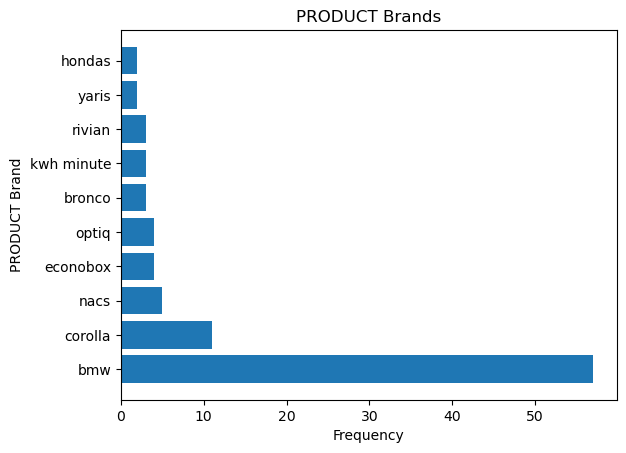

In [717]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='PRODUCT']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("PRODUCT Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("PRODUCT Brands")
plt.show()

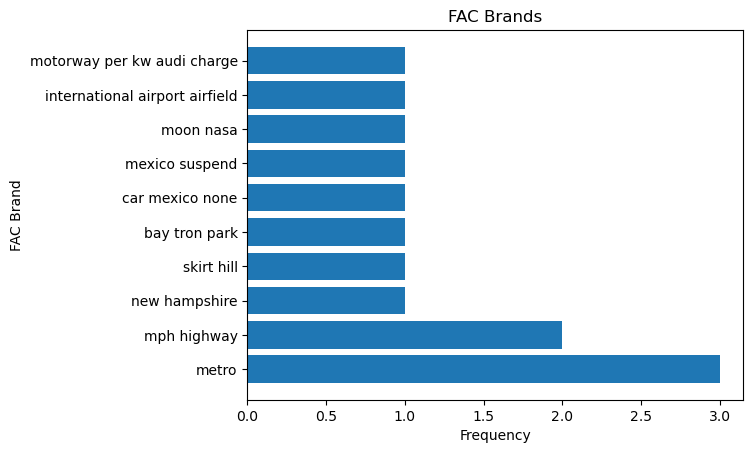

In [718]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='FAC']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("FAC Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("FAC Brands")
plt.show()

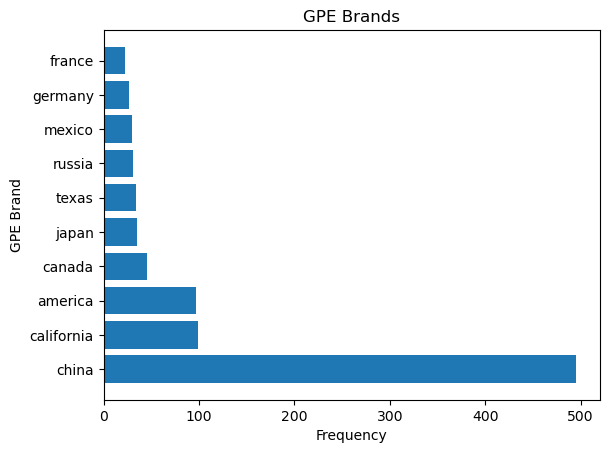

In [719]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='GPE']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("GPE Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("GPE Brands")
plt.show()

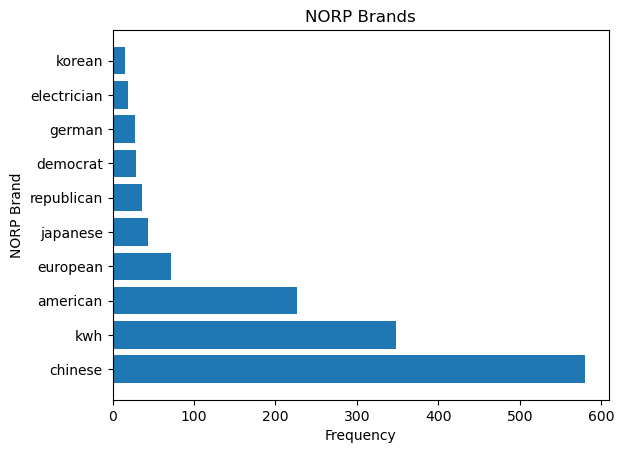

In [720]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='NORP']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("NORP Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("NORP Brands")
plt.show()

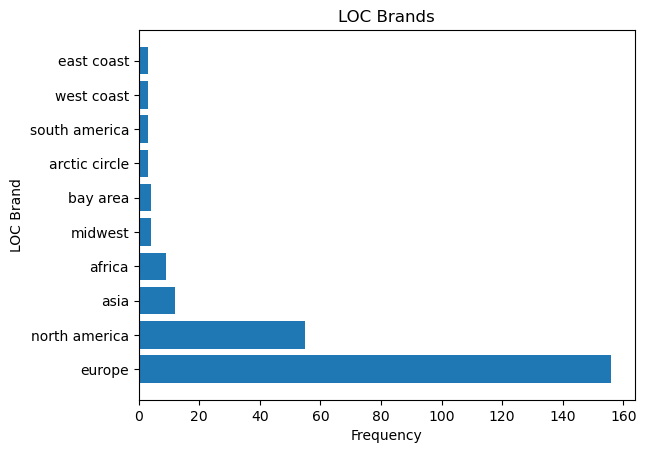

In [721]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='LOC']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("LOC Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("LOC Brands")
plt.show()

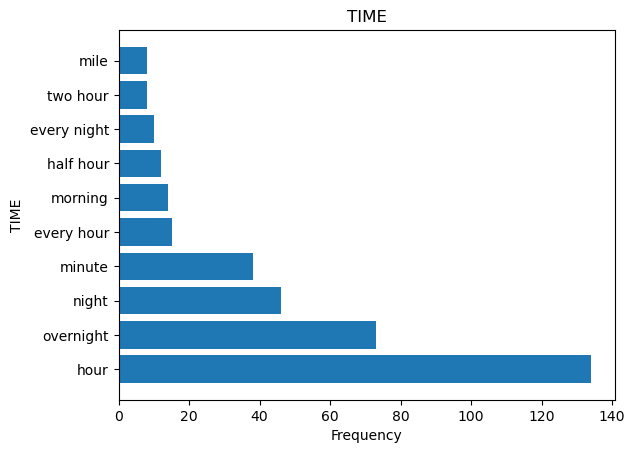

In [722]:
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] =='TIME']['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel("TIME")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title("TIME")
plt.show()

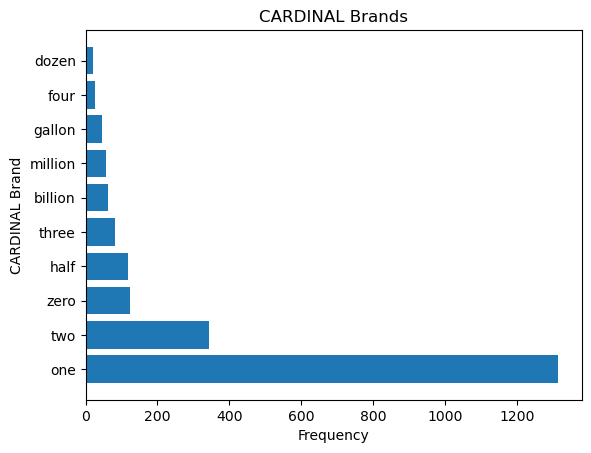

In [723]:
name_val = 'CARDINAL'
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

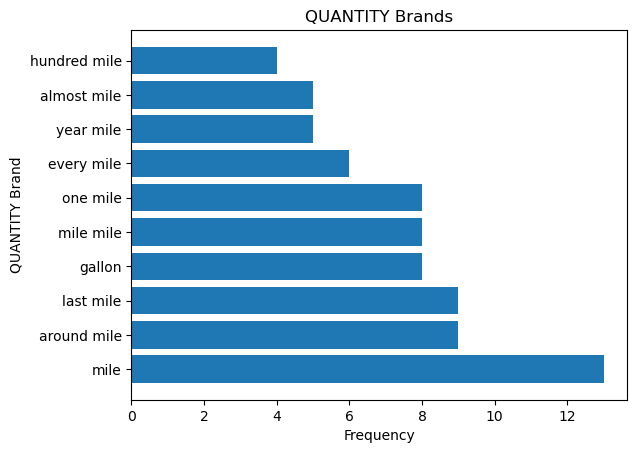

In [724]:
name_val = 'QUANTITY'
xdf = pd.DataFrame(df_ner_ques[df_ner_ques['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

In [725]:
word_counter = Counter()
for row in df_question.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_question"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_ques = pd.DataFrame(word_counter.most_common())
df_tf_ques.columns = ["term", "frequency"]
df_tf_ques

term  frequency
0          car       4926
1       charge       3999
2        tesla       3205
3          get       3187
4         like       2517
...        ...        ...
14683    phony          1
14684   yuuuge          1
14685     yuga          1
14686  ionique          1
14687  grenade          1

[14688 rows x 2 columns]

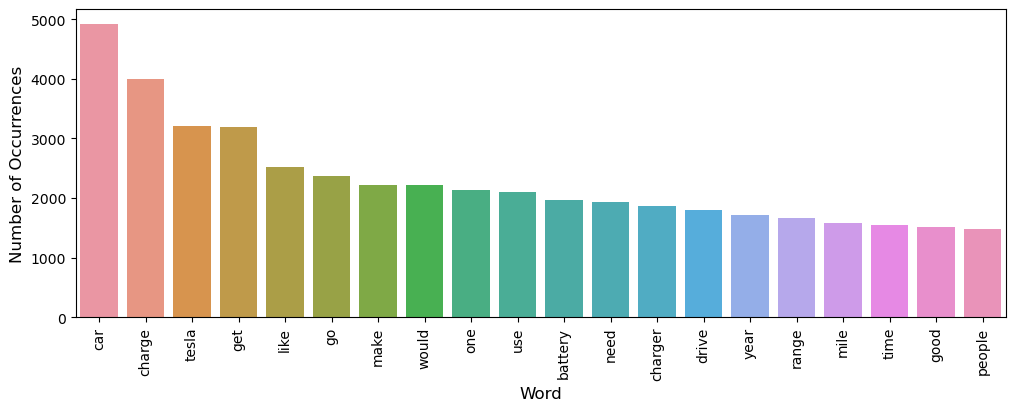

In [726]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_ques[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

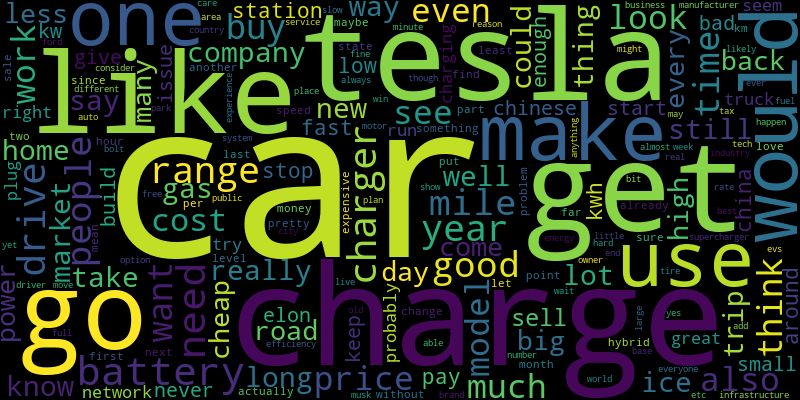

In [727]:

cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image_que = cloud.to_image()
image_que

In [728]:
documents = [comment.split() for comment in df_question['cleaned_question']]
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.015*"tesla" + 0.014*"car" + 0.013*"use" + 0.008*"need" + 0.008*"get" + '
  '0.008*"make" + 0.007*"see" + 0.007*"battery" + 0.007*"charge" + '
  '0.007*"year"'),
 (1,
  '0.023*"charge" + 0.014*"car" + 0.011*"like" + 0.009*"get" + 0.009*"tesla" + '
  '0.008*"charger" + 0.008*"would" + 0.007*"go" + 0.007*"make" + 0.006*"home"'),
 (2,
  '0.019*"tesla" + 0.019*"car" + 0.010*"get" + 0.008*"battery" + 0.008*"would" '
  '+ 0.008*"make" + 0.008*"like" + 0.007*"charge" + 0.007*"drive" + '
  '0.007*"good"'),
 (3,
  '0.020*"charge" + 0.015*"get" + 0.014*"car" + 0.010*"charger" + 0.009*"need" '
  '+ 0.007*"go" + 0.007*"like" + 0.007*"mile" + 0.006*"year" + 0.006*"people"'),
 (4,
  '0.012*"car" + 0.011*"go" + 0.011*"battery" + 0.011*"price" + 0.010*"one" + '
  '0.009*"make" + 0.009*"would" + 0.009*"get" + 0.006*"ice" + 0.006*"use"'),
 (5,
  '0.016*"tesla" + 0.014*"charge" + 0.010*"one" + 0.010*"get" + 0.008*"like" + '
  '0.008*"car" + 0.008*"range" + 0.007*"would" + 0.006*"buy" + '
  '0.00

<Axes: title={'center': 'Comments/Question'}, ylabel='Frequency'>

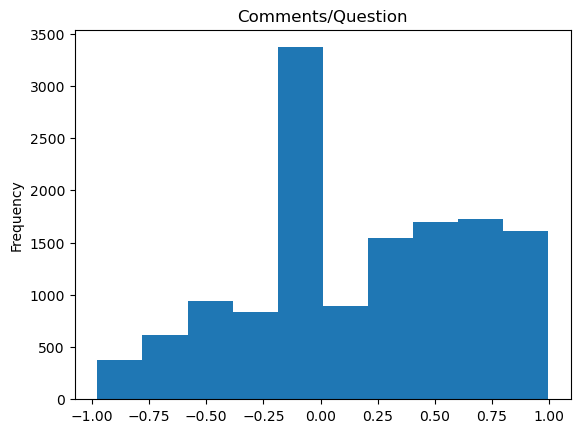

In [811]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_question"]
    return sia.polarity_scores(text)["compound"]

df_question["vader_sentiment"] = df_question.apply(score_vader, axis=1)
df_question["vader_sentiment"].plot(kind="hist",title = "Comments/Question")

In [730]:
print("Positive Question Count - " + str(len(df_question[df_question['vader_sentiment'] > 0])))
print("Neutral Question Count - " + str(len(df_question[df_question['vader_sentiment'] == 0])))
print("Negative Question Count - " + str(len(df_question[df_question['vader_sentiment'] < 0])))

Positive Question Count - 7473
Neutral Question Count - 2719
Negative Question Count - 3417


road trip 331
look like 256
mile range 255
charge home 228
ice car 202
make sense 192
charge station 183
gas station 175
fast charge 159
charge speed 140
year ago 134
tax credit 118
fast charger 116
buy tesla 114
new car 112
sound like 111
charge network 110
gas car 110
long range 104
year old 104


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

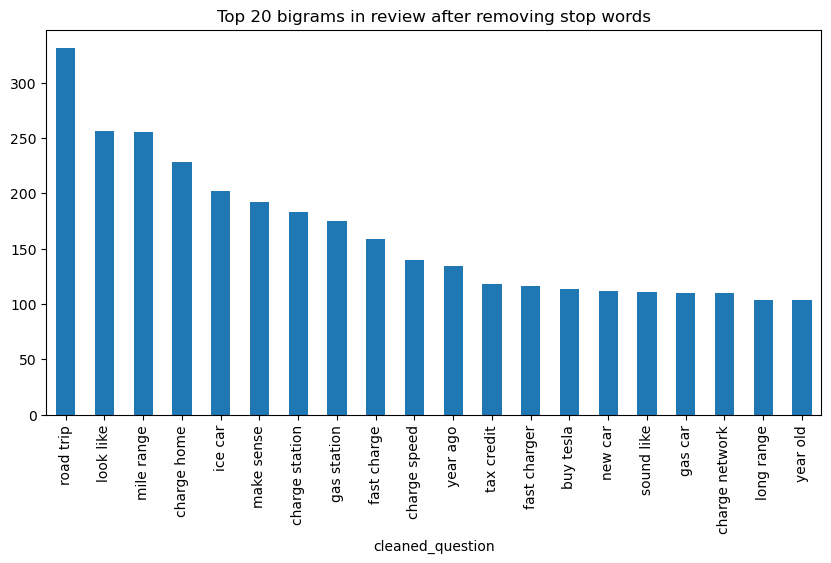

In [731]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,2)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


solid state battery 37
dc fast charge 36
dc fast charger 36
long road trip 31
mile round trip 29
drive mile day 23
real world range 21
single family home 17
charge home work 17
tesla charge network 16
cabin air filter 16
buy new car 15
mile real world 15
tesla car company 15
federal tax credit 13
mile road trip 13
range charge speed 13
daily commute mile 12
drive long distance 12
people charge home 12


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

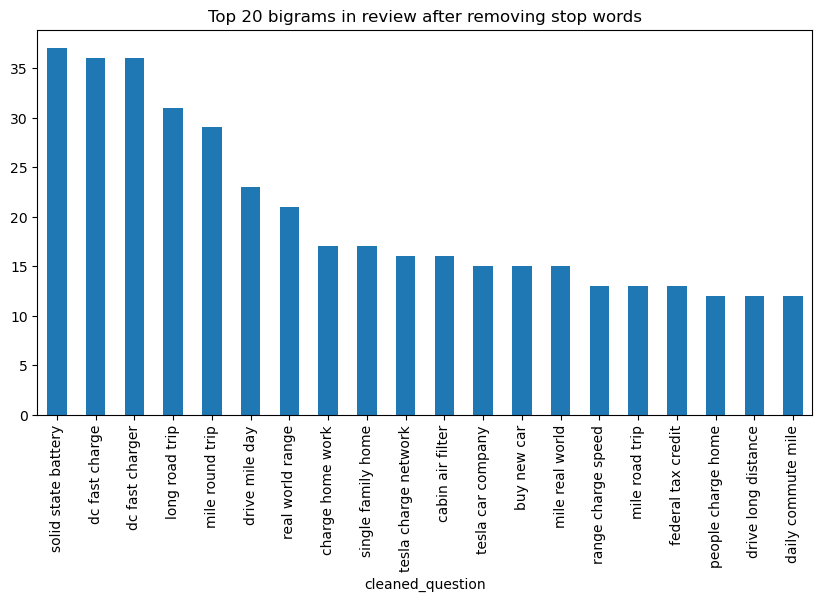

In [732]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


mile real world range 7
daily commute average weekly 6
commute average weekly mileage 6
living situation apartment townhouse 6
situation apartment townhouse single 6
apartment townhouse single family 6
townhouse single family home 6
plan instal charge home 6
charge station gas station 6
tap available credit debit 6
tesla model long range 5
cargo passenger need child 5
passenger need child pet 5
commute mile round trip 5
rear cross traffic alert 5
change cabin air filter 5
semi solid state battery 5
estimate timeframe purchase month 4
timeframe purchase month daily 4
purchase month daily commute 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

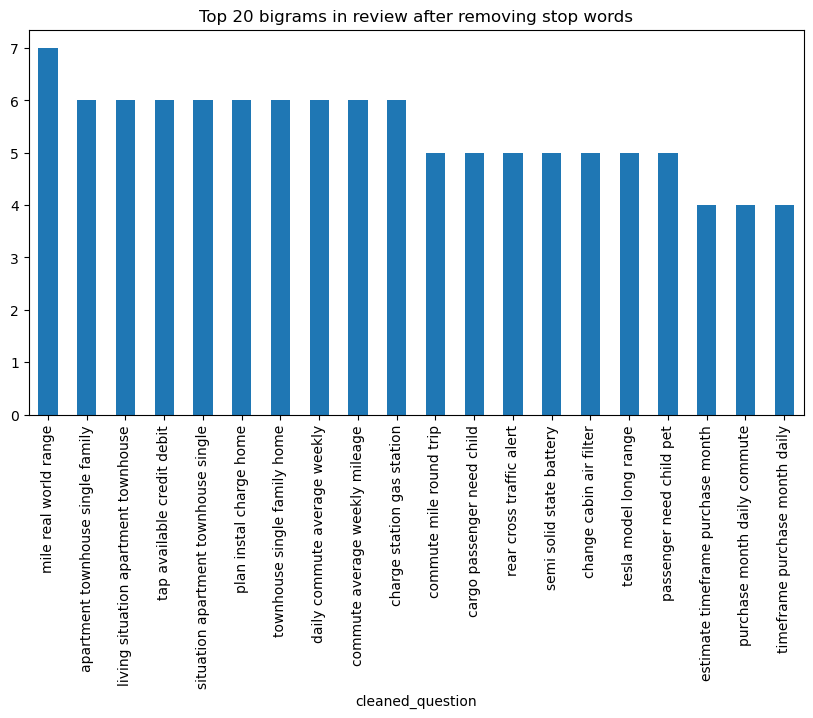

In [733]:

common_words = get_top_n_bigram(df_question['cleaned_question'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


cabin air filter 5
mile round trip 3
drive mile day 3
car mile range 3
dc fast charge 3
tesla charge network 3
charger gas station 3
buy tesla elon 3
able charge home 3
run extension cord 3
look like funeral 3
like funeral car 3
non tesla charge 2
gauge extension cord 2
install level charger 2
gtx trim later 2
drive work day 2
mile range extender 2
need mile range 2
mile range drive 2


<Axes: title={'center': 'Neutral Top 20 Phrases for comments/Question'}, xlabel='cleaned_question'>

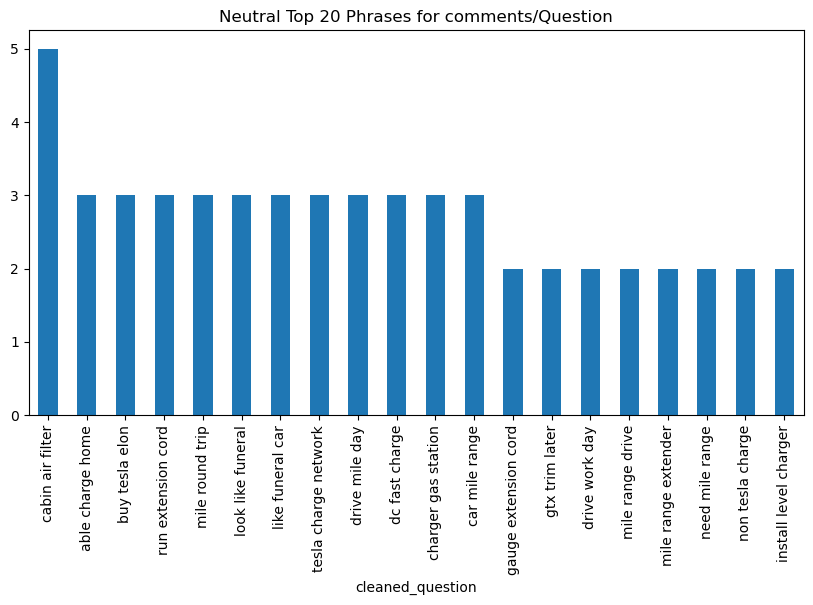

In [812]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] == 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Neutral Top 20 Phrases for comments/Question')


solid state battery 33
dc fast charger 27
dc fast charge 25
long road trip 24
mile round trip 22
drive mile day 16
charge home work 15
real world range 14
single family home 13
federal tax credit 13
mile real world 12
buy new car 12
daily commute mile 11
tesla charge network 11
make road trip 11
tesla car company 11
mile range charge 10
carplay android auto 10
semi solid state 10
car look like 9


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

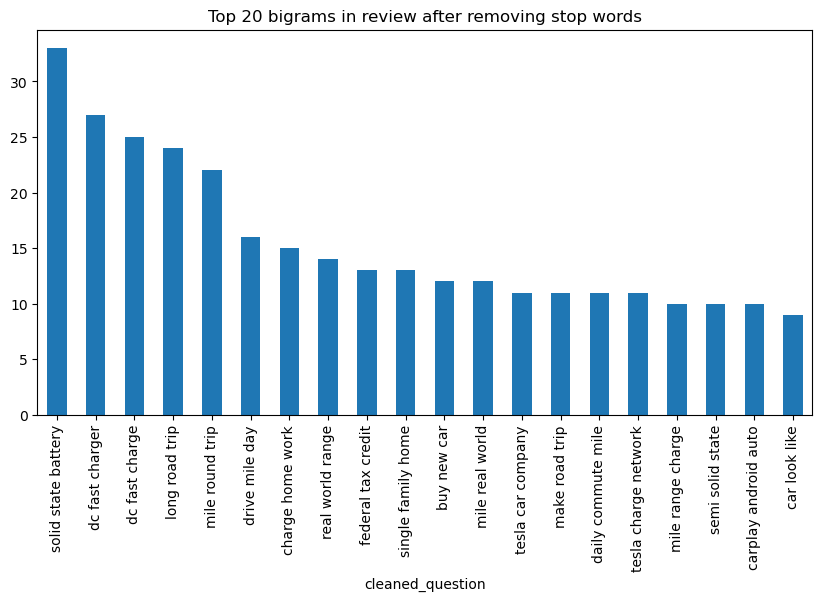

In [735]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] > 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


dc fast charge 8
long road trip 7
dc fast charger 7
mile road trip 6
real world range 6
year old son 5
fast charge station 5
charge speed range 5
used car market 5
hydrogen fuel cell 5
single family home 4
seven year old 4
mile round trip 4
bad case scenario 4
drive mile day 4
road trip car 4
solid state battery 4
scary auto industry 4
american auto industry 4
non tesla charger 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

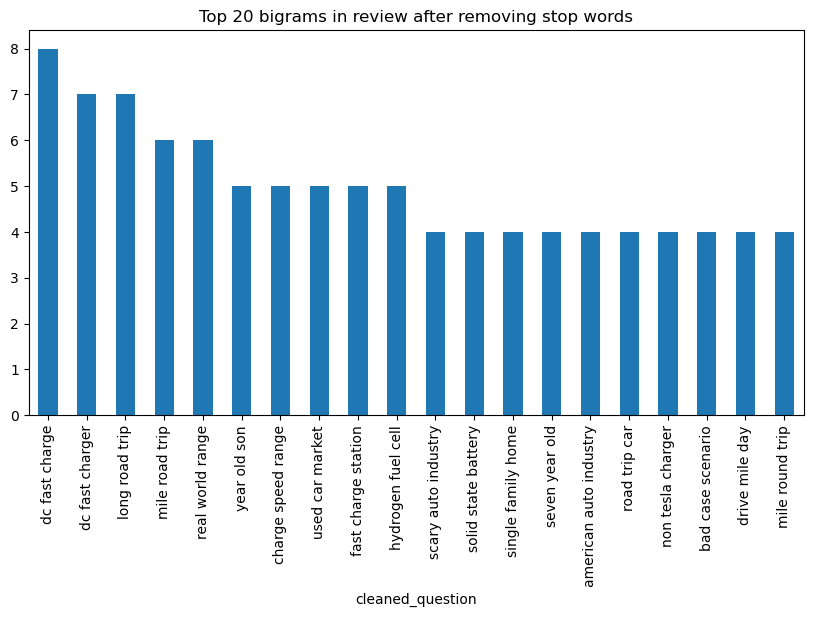

In [736]:

common_words = get_top_n_bigram(df_question[df_question['vader_sentiment'] < 0]['cleaned_question'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


Topic 1:  car charge like
Topic 2:  charge home mile
Topic 3:  tesla elon charger
Topic 4:  mile range km
Topic 5:  car ugly buy
Topic 6:  look like car
Topic 7:  want good people
Topic 8:  make china chinese
Topic 9:  price year sale
Topic 10:  buy battery love


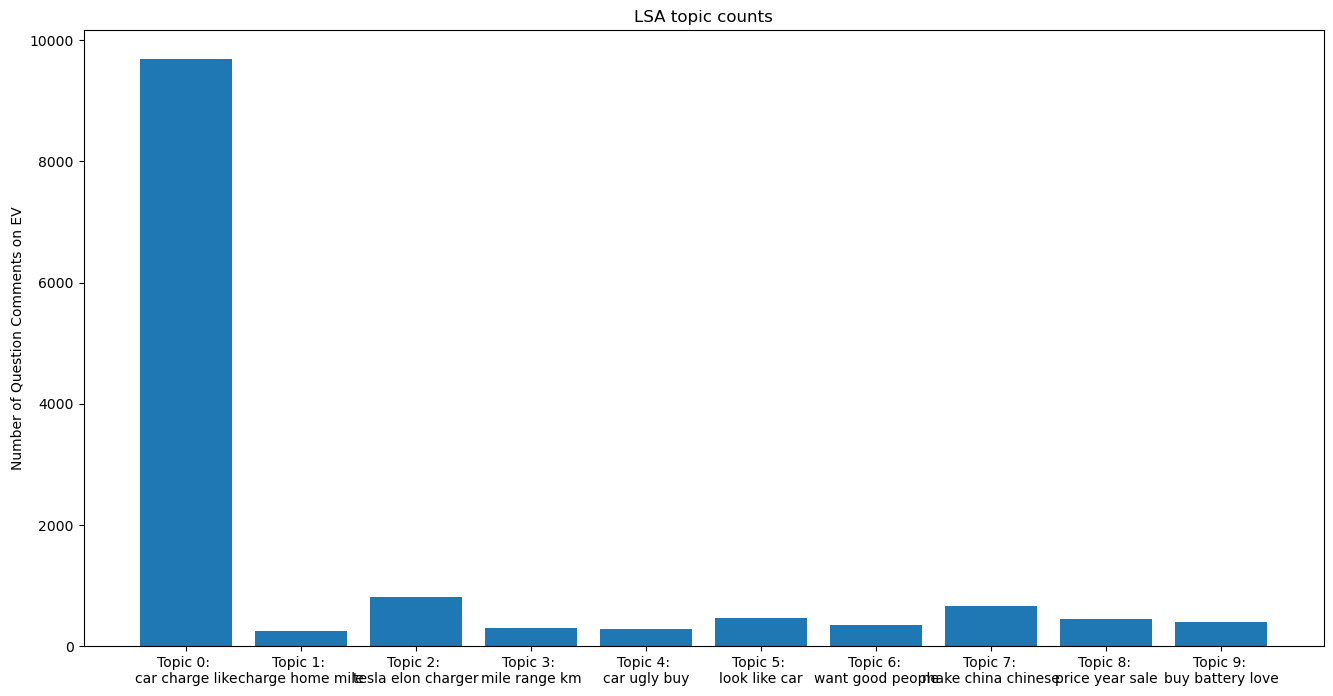

In [797]:
reindexed_data = df_question['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Question Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  charge charger car
Topic 2:  tesla buy supercharger
Topic 3:  car fugly build
Topic 4:  mile range drive
Topic 5:  need chinese know
Topic 6:  year come china
Topic 7:  buy wait plugshare
Topic 8:  make price people
Topic 9:  elon work drug
Topic 10:  use battery expensive


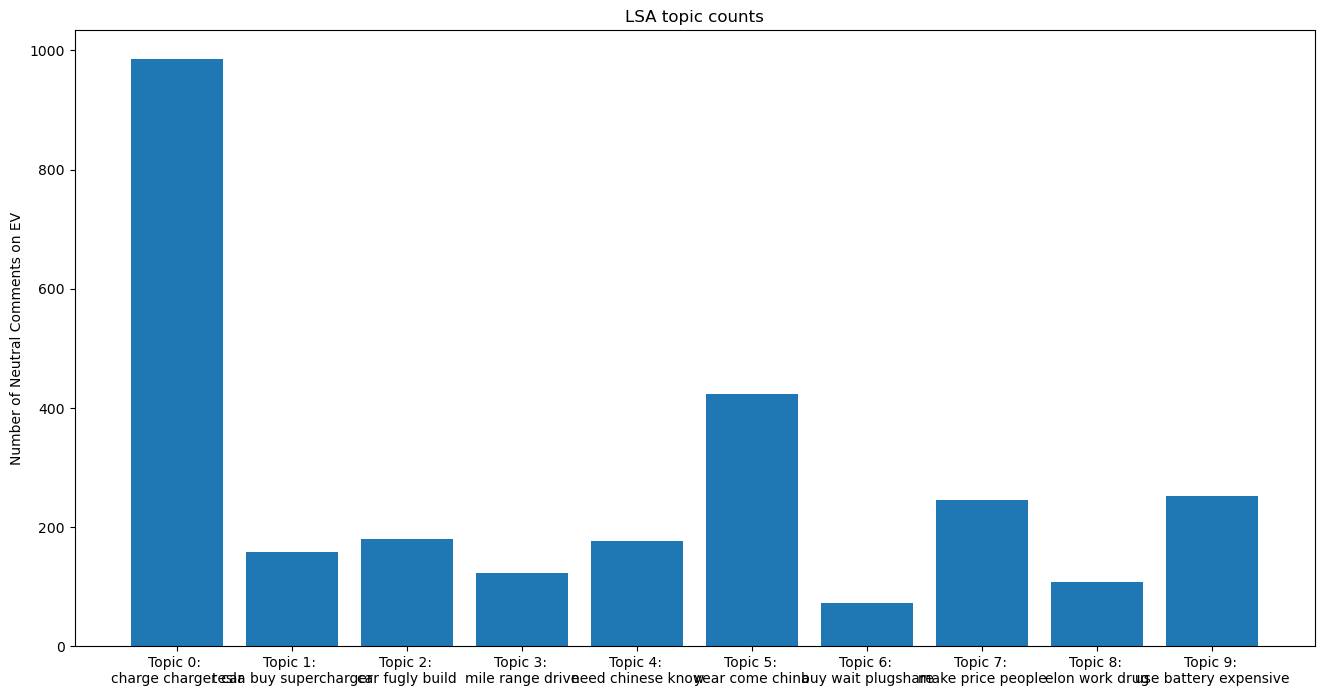

In [796]:
reindexed_data = df_question[df_question['vader_sentiment'] == 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car charge like
Topic 2:  charge home charger
Topic 3:  tesla charger network
Topic 4:  look like nice
Topic 5:  range mile tesla
Topic 6:  car lol want
Topic 7:  good pretty look
Topic 8:  want people care
Topic 9:  love buy great
Topic 10:  price charge chinese


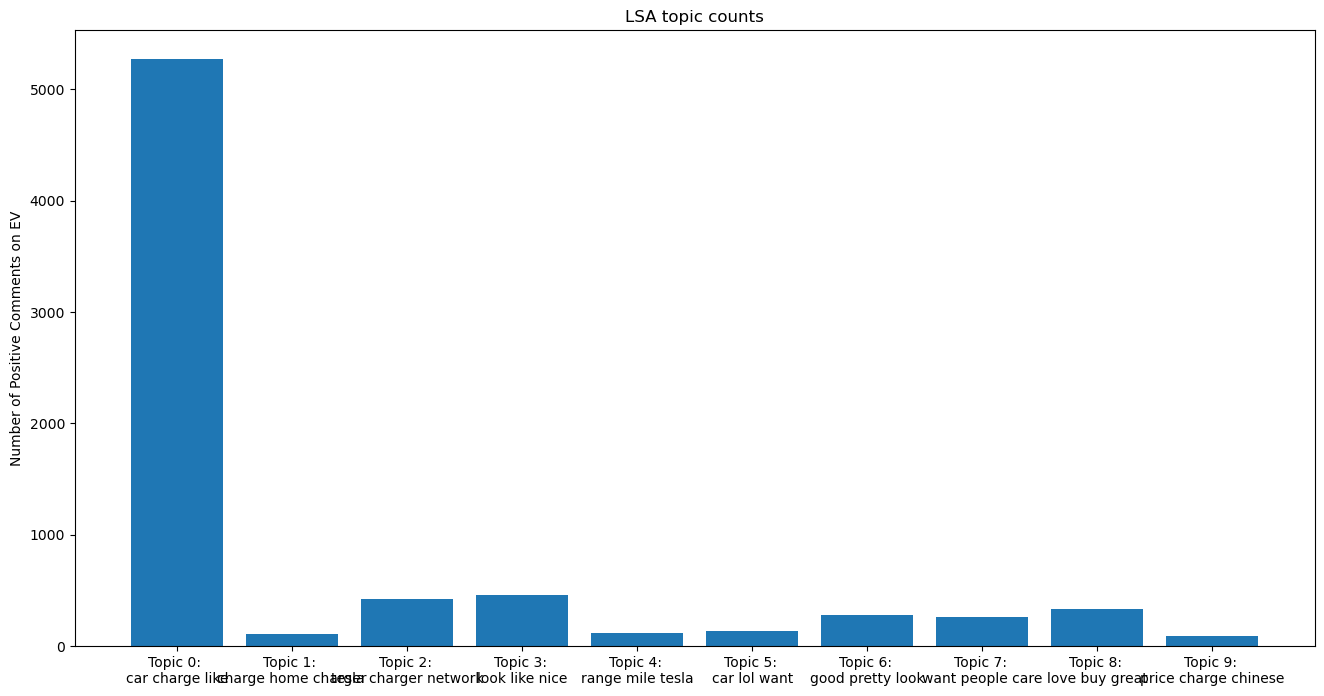

In [795]:
reindexed_data = df_question[df_question['vader_sentiment'] > 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Positive Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car charge tesla
Topic 2:  ugly car hell
Topic 3:  charge range stop
Topic 4:  tesla elon hate
Topic 5:  pay california car
Topic 6:  car bad like
Topic 7:  bad look like
Topic 8:  price low bad
Topic 9:  china kia chinese
Topic 10:  elon range fuck


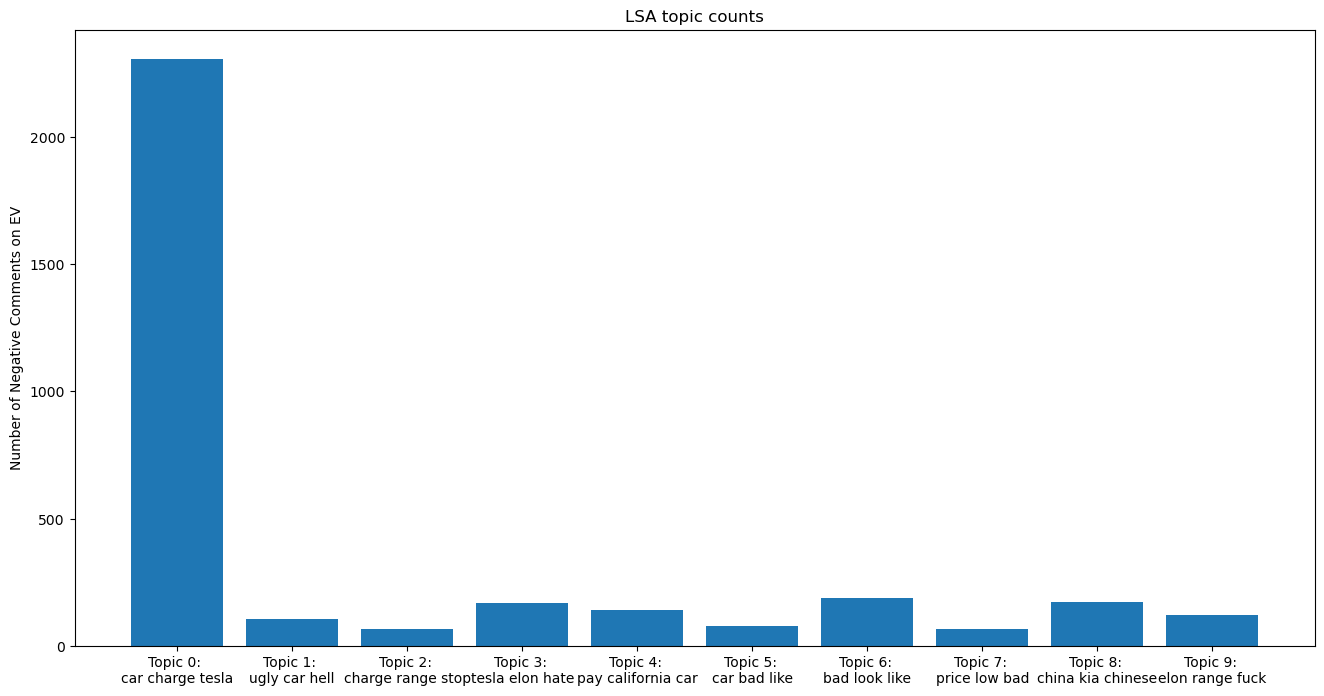

In [794]:
reindexed_data = df_question[df_question['vader_sentiment'] < 0]['cleaned_question']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])
    
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Negative Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

# Reply

In [741]:
df_reply= df[df['Type'] == 'Reply'][['comment_body','comment_created_utc']]
df_reply.head()

comment_body comment_created_utc
38  please share what you found out-brand new at E... 2024-05-03 22:19:33
39  Call your insurance to get a quote for each ca... 2024-05-02 09:06:32
40                         Kona is closer to a hatch. 2024-05-02 17:12:32
41  good thing for tesla is its still in productio... 2024-05-02 17:11:53
42  An option that has always intrigued me is find... 2024-05-03 19:57:33

In [742]:
df_reply['cleaned_reply'] = df_reply['comment_body'].apply(lambda x: preprocessing_text(x))
df_reply['cleaned_reply'] = df_reply['cleaned_reply'].apply(lambda x: word_stemmer(x))
df_reply['cleaned_reply'] = df_reply['cleaned_reply'].apply(lambda x: stop_words(x))
df_reply.head()

comment_body comment_created_utc  \
38  please share what you found out-brand new at E... 2024-05-03 22:19:33   
39  Call your insurance to get a quote for each ca... 2024-05-02 09:06:32   
40                         Kona is closer to a hatch. 2024-05-02 17:12:32   
41  good thing for tesla is its still in productio... 2024-05-02 17:11:53   
42  An option that has always intrigued me is find... 2024-05-03 19:57:33   

                                        cleaned_reply  
38  please share find brand new evs scared even kn...  
39  call insurance get quote car check monroney st...  
40                                  kona closer hatch  
41  good thing tesla still production negative ins...  
42  option always intrigue find audi tron use used...

In [743]:
print(len(df_reply))
df_reply.drop_duplicates('cleaned_reply',inplace=True)
print(len(df_reply))

41548
40079


In [744]:
reply_combined =''
for each in df_reply['cleaned_reply']:
    reply_combined = reply_combined + " " + each
print(reply_combined)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [745]:
print(len(reply_combined))

5530355


In [746]:
df_ner_reply = pd.DataFrame(columns=['Text','Label'])

In [747]:
startofdoc = 0
endofdoc = 1000000
while startofdoc <len(reply_combined) :
    print(startofdoc, endofdoc)
    doc = nlp(reply_combined[startofdoc:endofdoc])

    for ent in doc.ents:
        df_ner_reply.loc[len(df_ner_reply)]  = [ent.text, ent.label_]
    startofdoc = startofdoc + 1000000 
    endofdoc = endofdoc + 1000000 
    #     break
df_ner_reply.head()

0 1000000
1000000 2000000
2000000 3000000
3000000 4000000
4000000 5000000
5000000 6000000


Text    Label
0         kia      ORG
1         kia      ORG
2       first  ORDINAL
3   last year     DATE
4  mitsubishi      ORG

In [748]:

for each in df_ner_reply['Label'].unique():
    print(each)
    xorg = df_ner_reply[df_ner_reply['Label'] ==each]
    print(xorg['Text'].value_counts()[:10])
    print("-----"*20)

ORG
ford        1017
gm           788
toyota       626
kia          493
hyundai      335
epa          180
nissan       177
tesla        110
cadillac      98
bmw           97
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
ORDINAL
first       1111
second       507
third        171
secondly      13
fourth        11
fifth         11
firstly        4
tenth          3
sixth          2
nth            2
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
DATE
year         1043
today         456
last year     416
month         268
daily         247
year ago      219
winter        212
next year     201
day           170
decade        143
Name: Text, dtype: int64
----------------------------------------------------------------------------------------------------
NORP
chinese       1711
american       696
kwh            684
european       218
japa

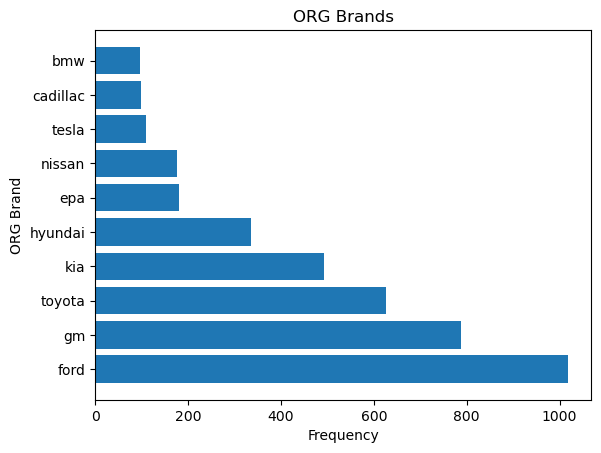

In [749]:
name_val = 'ORG'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

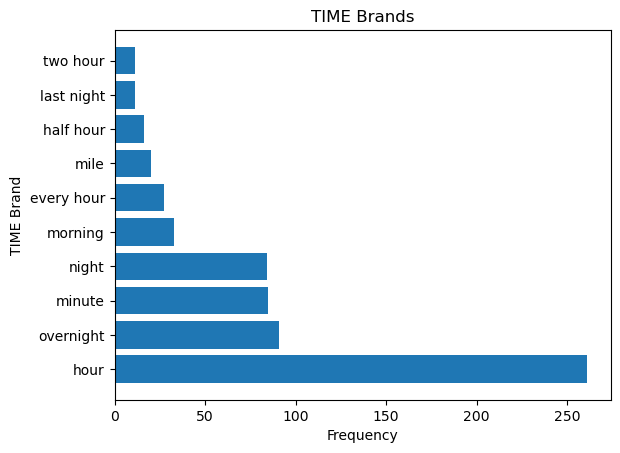

In [750]:
name_val = 'TIME'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

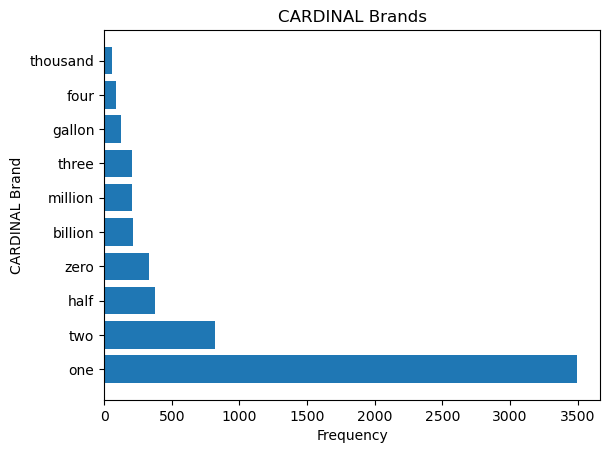

In [751]:
name_val = 'CARDINAL'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

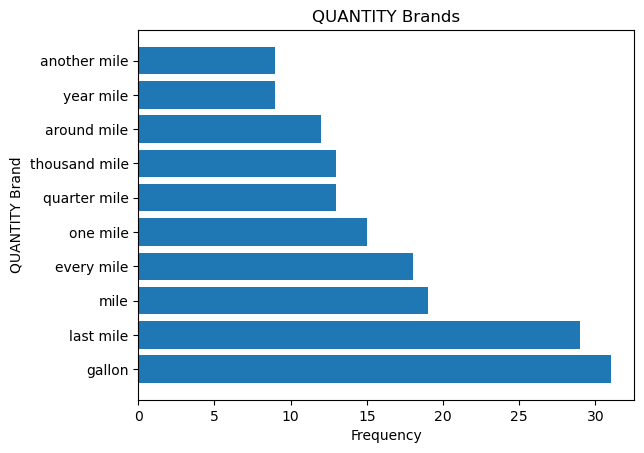

In [752]:
name_val = 'QUANTITY'
xdf = pd.DataFrame(df_ner_reply[df_ner_reply['Label'] ==name_val]['Text'].value_counts()[:10]).reset_index()
xdf = xdf.rename(columns = {'index':'ORG'})
xdf = xdf.rename(columns = {'Text':'frequency'})
plt.barh(xdf.ORG, xdf.frequency)
 
# setting label of y-axis
plt.ylabel( name_val + " Brand")
 
# setting label of x-axis
plt.xlabel("Frequency") 
plt.title(name_val + " Brands")
plt.show()

In [753]:
word_counter = Counter()
for row in df_reply.to_dict("records"): #converts_to_dictionary
    word_counter.update(row["cleaned_reply"].split()) #tokenization
# df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf_reply = pd.DataFrame(word_counter.most_common())
df_tf_reply.columns = ["term", "frequency"]
df_tf_reply

term  frequency
0                  car      12434
1                tesla       8946
2                  get       7837
3                 like       7005
4                 make       6431
...                ...        ...
22811       presuppose          1
22812           averse          1
22813  invulnerability          1
22814         unfilled          1
22815             miio          1

[22816 rows x 2 columns]

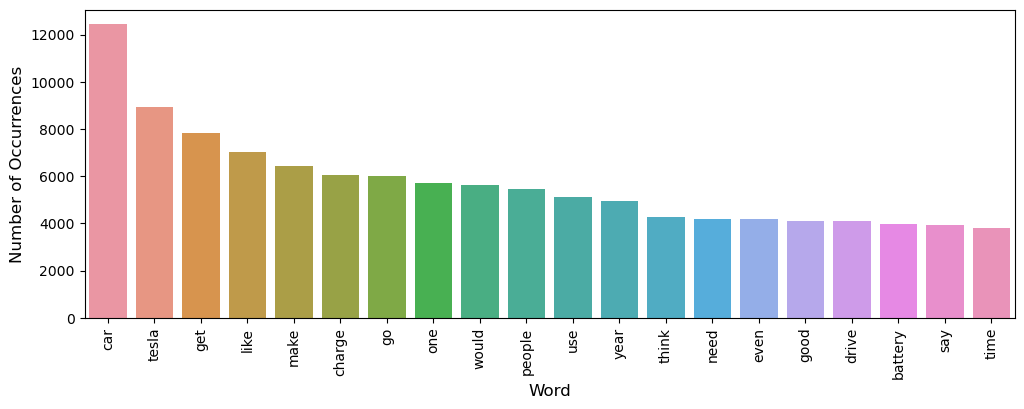

In [754]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_tf_reply[:20], x='term', y='frequency') #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

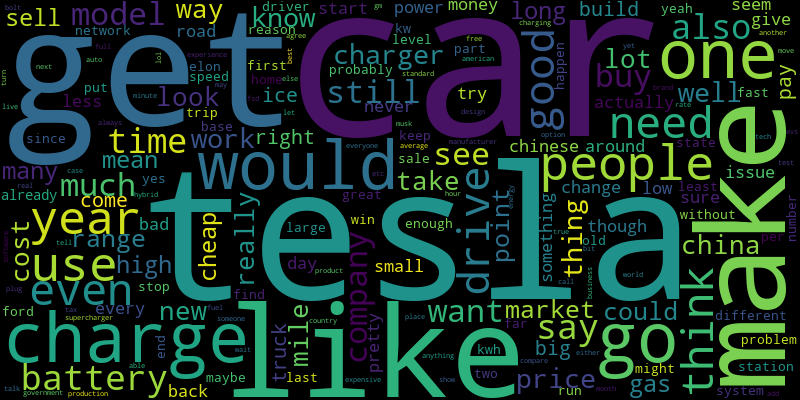

In [755]:
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image_reply = cloud.to_image()
image_reply

In [756]:
documents = [comment.split() for comment in df_reply['cleaned_reply']]
vocab = corpora.Dictionary(documents) #creating_dictionaries
corpus = [vocab.doc2bow(text) for text in documents] #converts_to_bag-of-words_format(IDandFrequency)

num_topics = 10
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

[(0,
  '0.013*"get" + 0.008*"tesla" + 0.007*"battery" + 0.006*"year" + 0.006*"one" '
  '+ 0.006*"make" + 0.005*"go" + 0.005*"model" + 0.005*"think" + '
  '0.005*"china"'),
 (1,
  '0.016*"car" + 0.008*"get" + 0.008*"battery" + 0.008*"make" + 0.008*"tesla" '
  '+ 0.007*"even" + 0.006*"would" + 0.005*"good" + 0.005*"charge" + '
  '0.005*"people"'),
 (2,
  '0.012*"like" + 0.012*"get" + 0.011*"would" + 0.010*"year" + 0.008*"car" + '
  '0.008*"go" + 0.007*"people" + 0.007*"think" + 0.007*"one" + 0.006*"tesla"'),
 (3,
  '0.014*"car" + 0.013*"tesla" + 0.011*"charge" + 0.011*"people" + '
  '0.011*"like" + 0.010*"one" + 0.009*"make" + 0.009*"would" + 0.009*"charger" '
  '+ 0.008*"get"'),
 (4,
  '0.012*"car" + 0.009*"go" + 0.009*"like" + 0.008*"tesla" + 0.007*"make" + '
  '0.007*"charge" + 0.006*"people" + 0.006*"say" + 0.006*"drive" + '
  '0.006*"get"'),
 (5,
  '0.028*"tesla" + 0.021*"car" + 0.010*"good" + 0.009*"make" + 0.008*"like" + '
  '0.008*"get" + 0.007*"much" + 0.006*"market" + 0.006*"on

<Axes: ylabel='Frequency'>

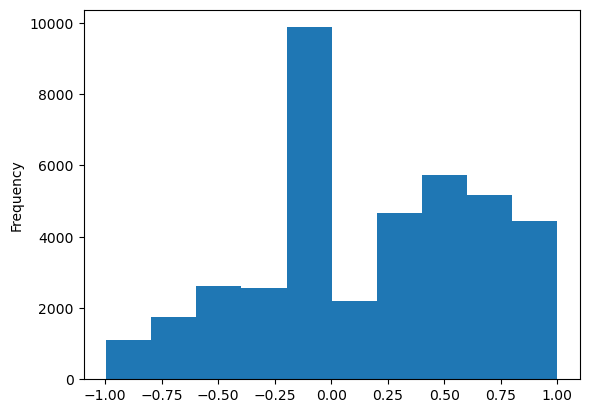

In [757]:
sia = SentimentIntensityAnalyzer()
def score_vader(row):
    text = row["cleaned_reply"]
    return sia.polarity_scores(text)["compound"]

df_reply["vader_sentiment"] = df_reply.apply(score_vader, axis=1)
df_reply["vader_sentiment"].plot(kind="hist")

In [758]:
print("Positive Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] > 0])))
print("Neutral Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] == 0])))
print("Negative Reply Count - " + str(len(df_reply[df_reply['vader_sentiment'] < 0])))

Positive Reply Count - 22204
Neutral Reply Count - 7911
Negative Reply Count - 9964


buy new car 49
dc fast charge 48
long road trip 42
solid state battery 39
drive mile day 36
dc fast charger 36
self drive car 30
new car sale 29
best selling car 28
people buy car 28
make lot sense 28
high speed rail 28
federal tax credit 27
tesla charge network 26
tesla supercharger network 26
nuclear power plant 26
carplay android auto 25
like gas station 25
people buy tesla 25
non tesla charger 25


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

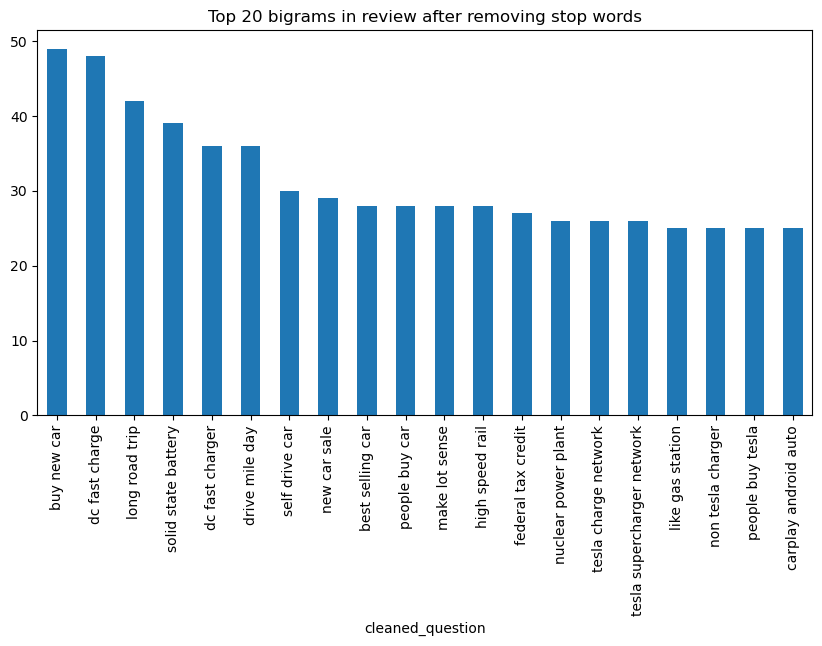

In [759]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


android auto apple carplay 14
low price grocery getter 14
china network distributed solar 14
network distributed solar asset 14
distributed solar asset large 14
solar asset large entire 14
asset large entire solar 14
large entire solar fleet 14
entire solar fleet include 14
solar fleet include type 14
fleet include type project 14
include type project acceleration 14
type project acceleration installation 14
project acceleration installation fuel 14
acceleration installation fuel forecast 14
installation fuel forecast world 14
fuel forecast world polluter 14
forecast world polluter touch 14
world polluter touch peak 14
polluter touch peak emission 14


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

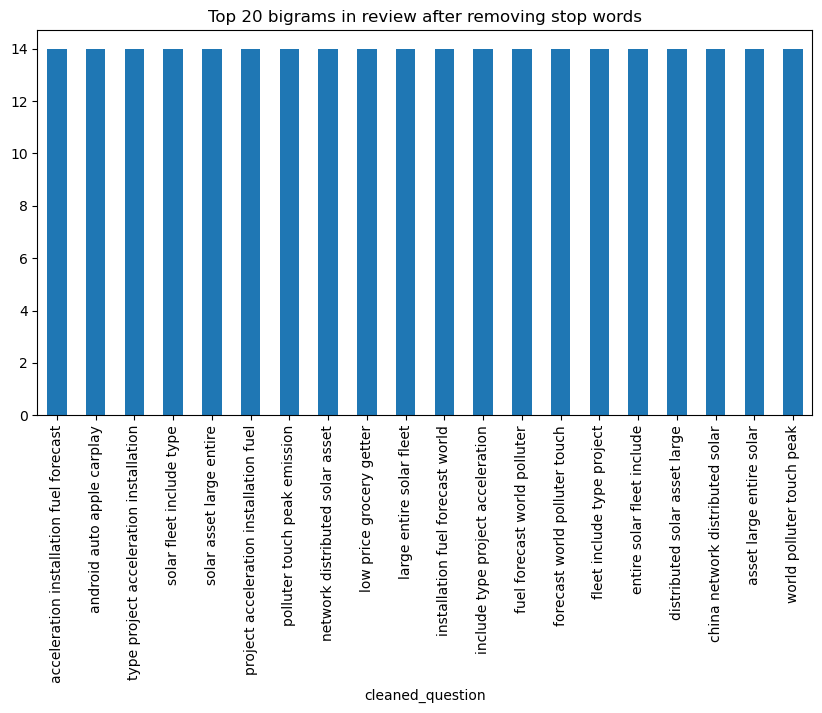

In [760]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


china network distributed solar asset 14
network distributed solar asset large 14
distributed solar asset large entire 14
solar asset large entire solar 14
asset large entire solar fleet 14
large entire solar fleet include 14
entire solar fleet include type 14
solar fleet include type project 14
fleet include type project acceleration 14
include type project acceleration installation 14
type project acceleration installation fuel 14
project acceleration installation fuel forecast 14
acceleration installation fuel forecast world 14
installation fuel forecast world polluter 14
fuel forecast world polluter touch 14
forecast world polluter touch peak 14
world polluter touch peak emission 14
polluter touch peak emission year 14
touch peak emission year major 14
peak emission year major industrial 14


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_question'>

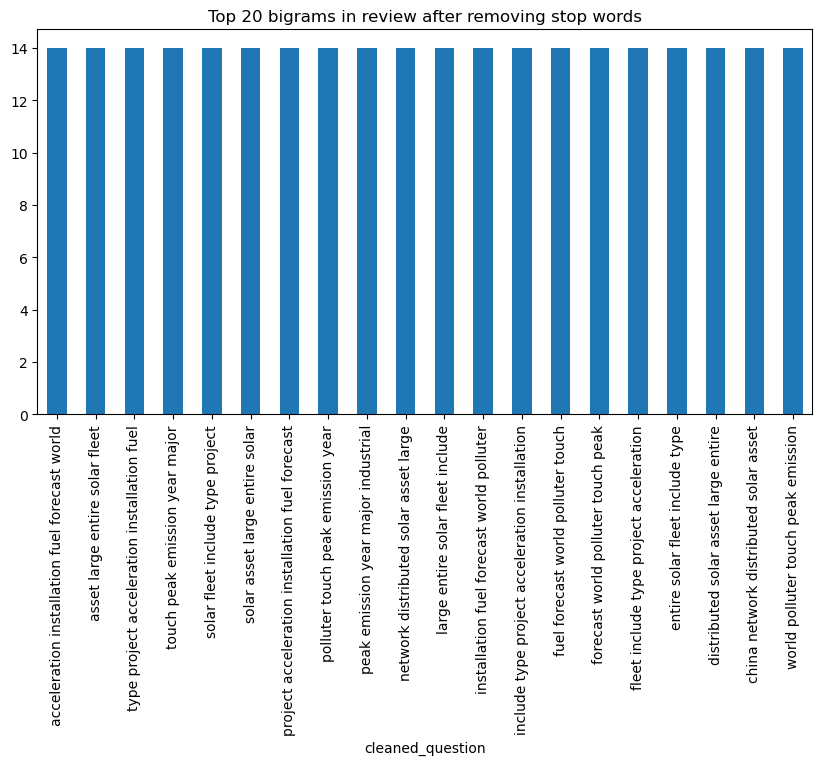

In [768]:

common_words = get_top_n_bigram(df_reply['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_question' , 'count'])
df4.groupby('cleaned_question').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


drive mile day 7
battery wh kg 6
electrify america replace 5
model long range 5
long road trip 5
average new car 5
real world range 5
kw car kw 4
charger electrify america 4
car mile range 4
tesla sell car 4
make money car 4
mile round trip 4
dc fast charge 4
high speed rail 4
new car sale 4
build factory mexico 4
year year growth 4
ctp battery wh 4
wh kg euro 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

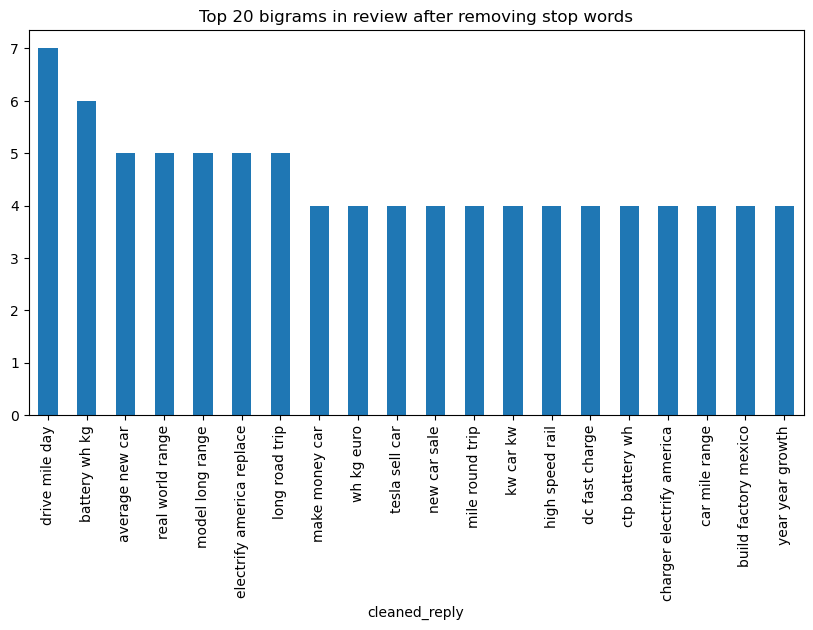

In [761]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


ctp battery wh kg 4
battery wh kg euro 4
wh kg euro kwh 4
android auto apple carplay 3
electrify america replace old 2
america replace old charger 2
replace old charger new 2
subject chinese import duty 2
charger able deliver kw 2
kw car kw car 2
electrify america big charge 2
america big charge network 2
establish car maker prove 2
car maker prove build 2
maker prove build infrastructure 2
thing like remove stalk 2
like remove stalk capacitive 2
remove stalk capacitive button 2
stalk capacitive button mess 2
mile round trip commute 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

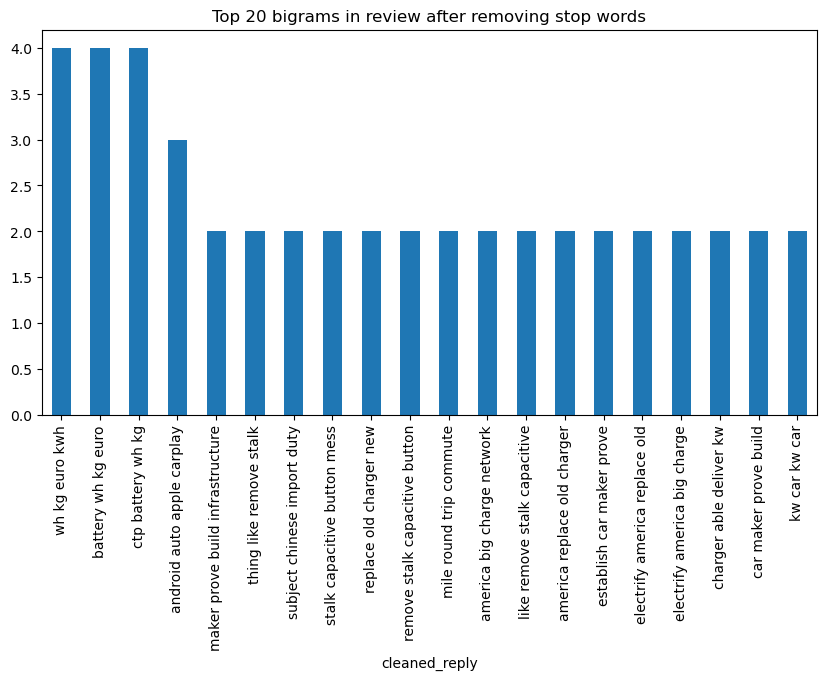

In [770]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


ctp battery wh kg euro 4
battery wh kg euro kwh 4
electrify america replace old charger 2
america replace old charger new 2
electrify america big charge network 2
establish car maker prove build 2
car maker prove build infrastructure 2
thing like remove stalk capacitive 2
like remove stalk capacitive button 2
remove stalk capacitive button mess 2
tell drive la rush hour 2
drive la rush hour traffic 2
cat il decision height foot 2
realize real porch start right 2
ice real world range km 2
compete kona eu subcompact car 2
ford mustang mach rank second 2
mustang mach rank second fast 2
mach rank second fast charge 2
rank second fast charge test 2


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

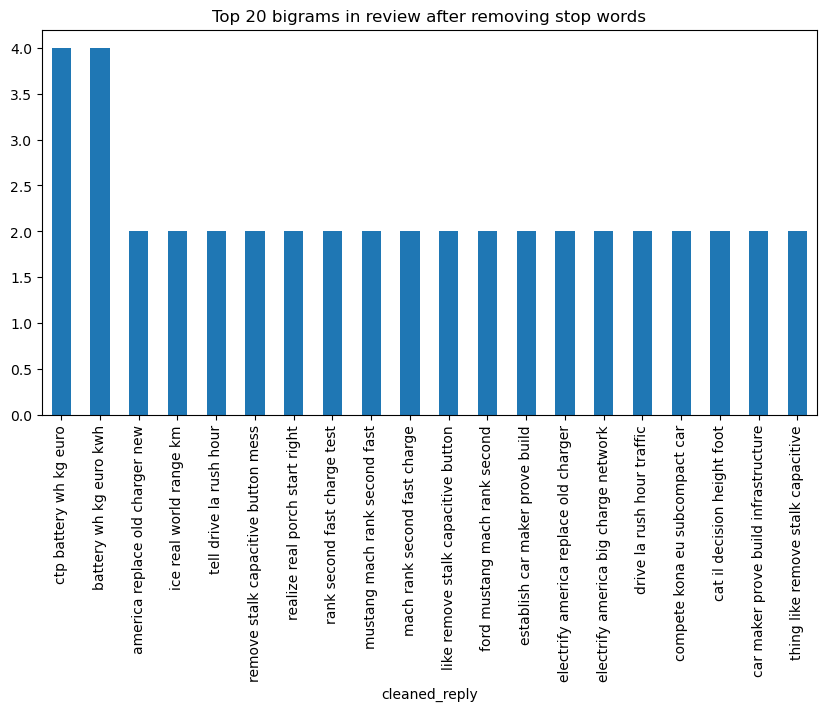

In [771]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


buy new car 42
solid state battery 34
long road trip 32
dc fast charge 30
dc fast charger 27
federal tax credit 25
best selling car 24
tesla supercharger network 23
tesla charge network 22
nuclear power plant 22
drive mile day 21
qualify tax credit 20
like gas station 19
make lot sense 19
self drive car 19
high speed rail 19
semi solid state 18
greenhouse gas emission 17
new car sale 16
people buy tesla 16


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

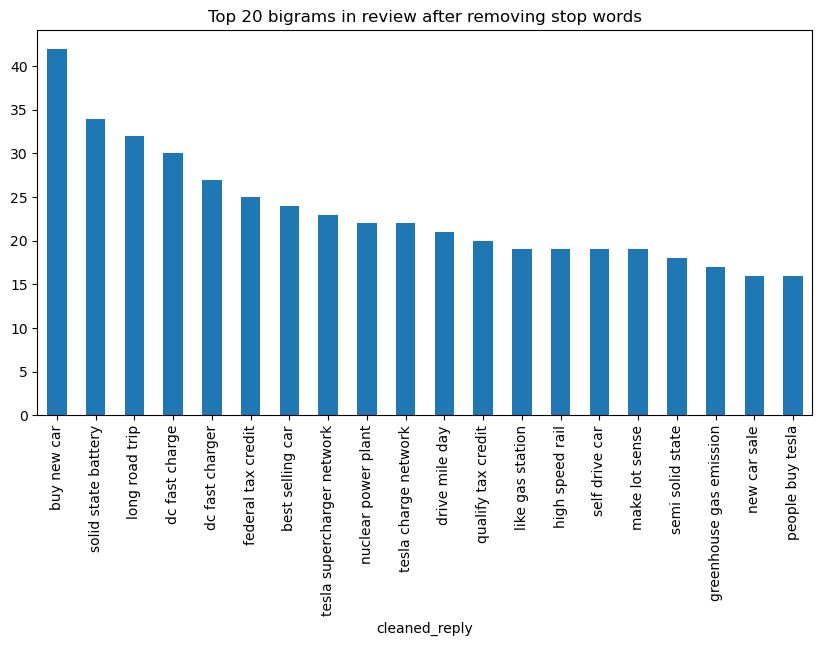

In [762]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


china network distributed solar 14
network distributed solar asset 14
distributed solar asset large 14
solar asset large entire 14
asset large entire solar 14
large entire solar fleet 14
entire solar fleet include 14
solar fleet include type 14
fleet include type project 14
include type project acceleration 14
type project acceleration installation 14
project acceleration installation fuel 14
acceleration installation fuel forecast 14
installation fuel forecast world 14
fuel forecast world polluter 14
forecast world polluter touch 14
world polluter touch peak 14
polluter touch peak emission 14
touch peak emission year 14
peak emission year major 14


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

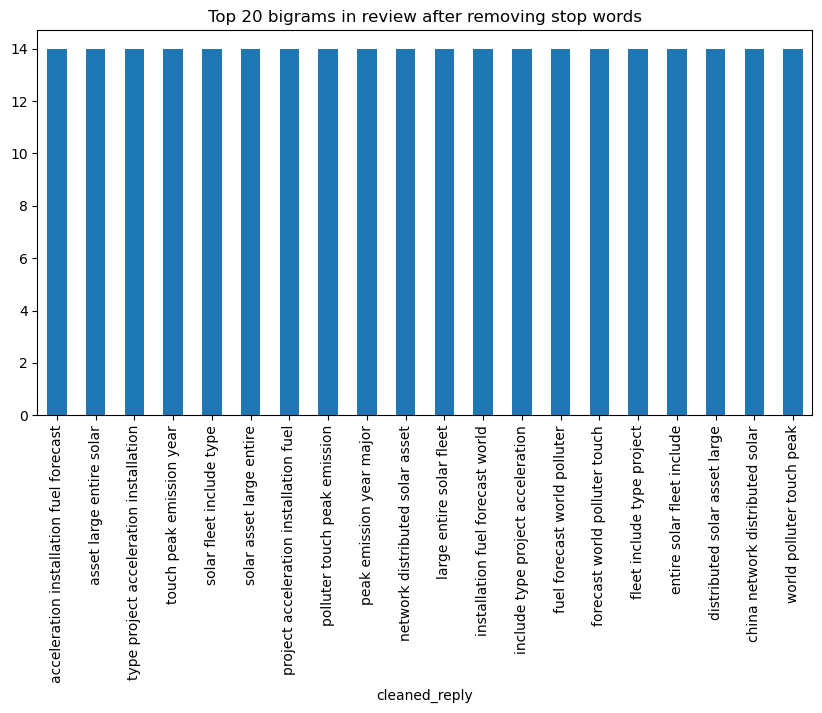

In [772]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


china network distributed solar asset 14
network distributed solar asset large 14
distributed solar asset large entire 14
solar asset large entire solar 14
asset large entire solar fleet 14
large entire solar fleet include 14
entire solar fleet include type 14
solar fleet include type project 14
fleet include type project acceleration 14
include type project acceleration installation 14
type project acceleration installation fuel 14
project acceleration installation fuel forecast 14
acceleration installation fuel forecast world 14
installation fuel forecast world polluter 14
fuel forecast world polluter touch 14
forecast world polluter touch peak 14
world polluter touch peak emission 14
polluter touch peak emission year 14
touch peak emission year major 14
peak emission year major industrial 14


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

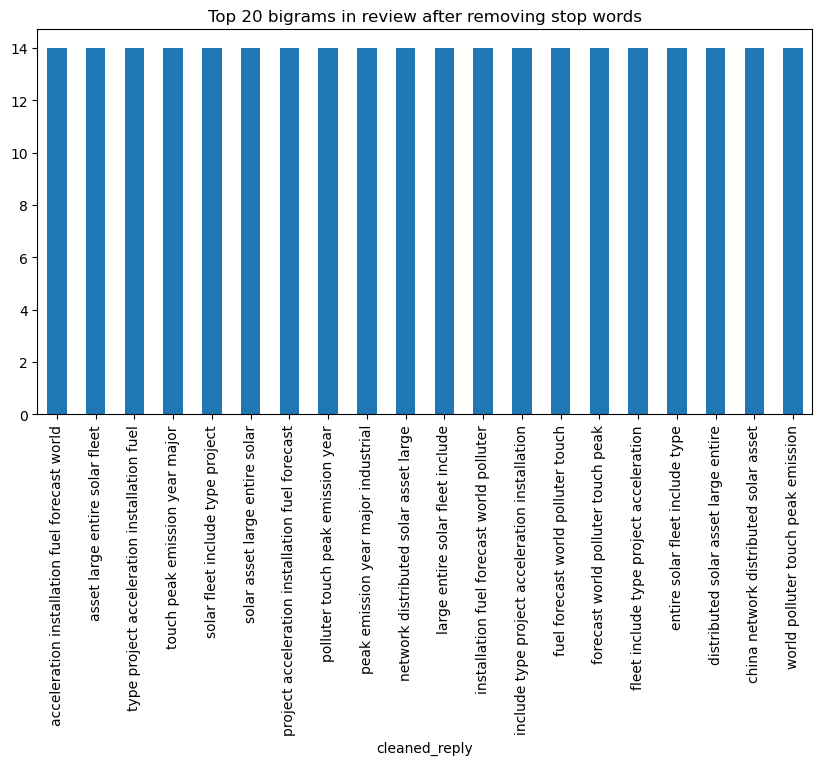

In [773]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


dc fast charge 14
people buy car 10
year old car 10
non tesla charger 9
carplay android auto 9
adaptive cruise control 9
new car sale 9
bad case scenario 9
drive mile day 8
mile road trip 8
self drive car 8
lose market share 8
rental car company 8
people buy tesla 7
spend lot time 7
tesla build quality 7
low price grocery 7
car wash mode 7
ban gas stove 7
couple year ago 7


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

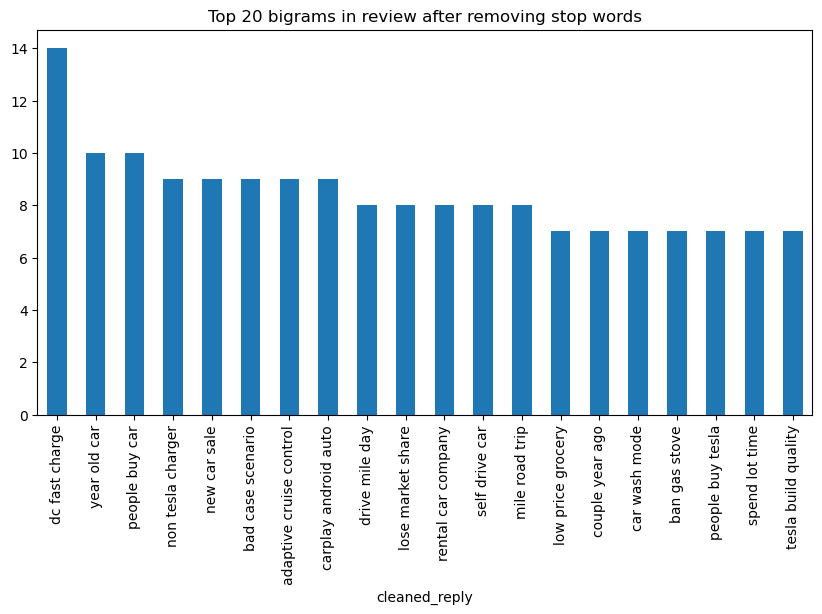

In [763]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,3)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


low price grocery getter 6
remember time sokka accidentally 6
time sokka accidentally use 6
sokka accidentally use extra 6
accidentally use extra syllable 6
use extra syllable haiku 6
extra syllable haiku battle 6
syllable haiku battle ba 6
haiku battle ba sing 6
battle ba sing se 6
ba sing se sokka 6
sing se sokka haiku 6
se sokka haiku make 6
damage cause car wash 5
bad case climate scenario 5
cut nose spite face 4
make money lightning charge 4
ford lose nearly billion 4
lose nearly billion business 4
nearly billion business project 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

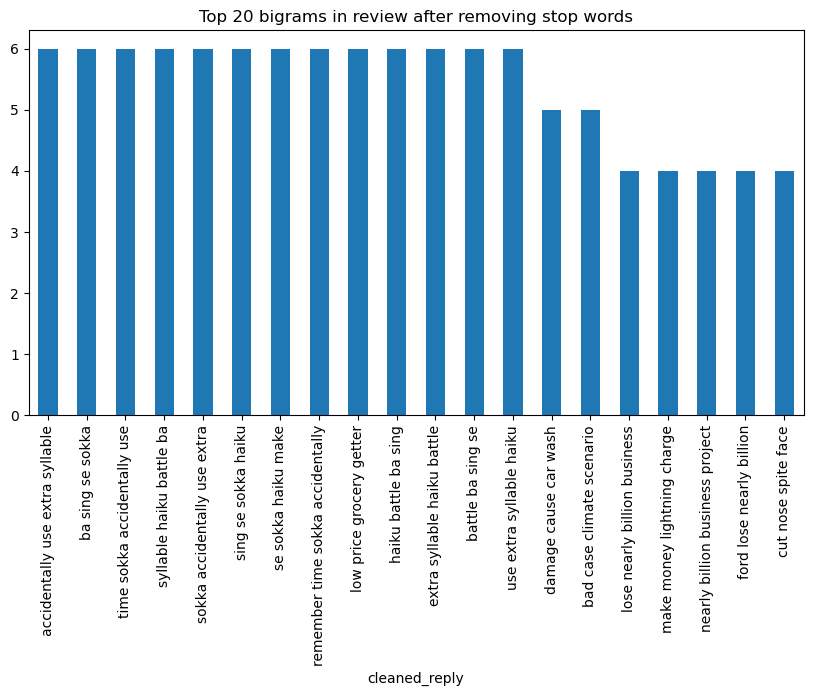

In [774]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,4)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


remember time sokka accidentally use 6
time sokka accidentally use extra 6
sokka accidentally use extra syllable 6
accidentally use extra syllable haiku 6
use extra syllable haiku battle 6
extra syllable haiku battle ba 6
syllable haiku battle ba sing 6
haiku battle ba sing se 6
battle ba sing se sokka 6
ba sing se sokka haiku 6
sing se sokka haiku make 6
ford lose nearly billion business 4
lose nearly billion business project 4
nearly billion business project lose 4
billion business project lose billion 4
business project lose billion billion 4
project lose billion billion year 4
lose billion billion year say 4
billion billion year say february 4
billion year say february generation 4


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='cleaned_reply'>

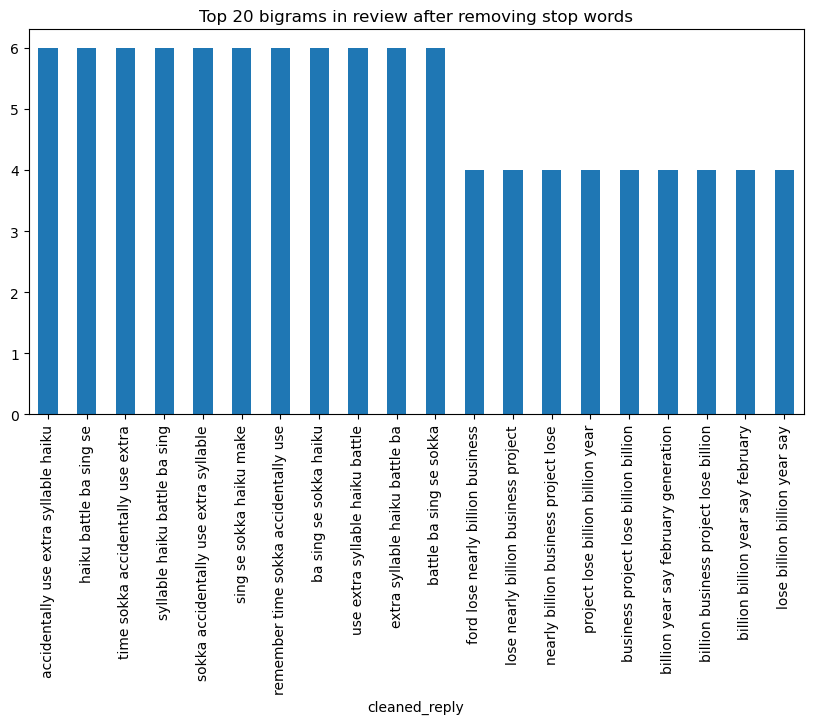

In [775]:

common_words = get_top_n_bigram(df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply'], 20,5)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['cleaned_reply' , 'count'])
df4.groupby('cleaned_reply').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', figsize = (10,5),title='Top 20 bigrams in review after removing stop words')


Topic 1:  car like think
Topic 2:  charge charger kw
Topic 3:  tesla supercharger network
Topic 4:  car buy drive
Topic 5:  battery year model
Topic 6:  china chinese company
Topic 7:  year ago old
Topic 8:  price model good
Topic 9:  people buy want
Topic 10:  make mile range


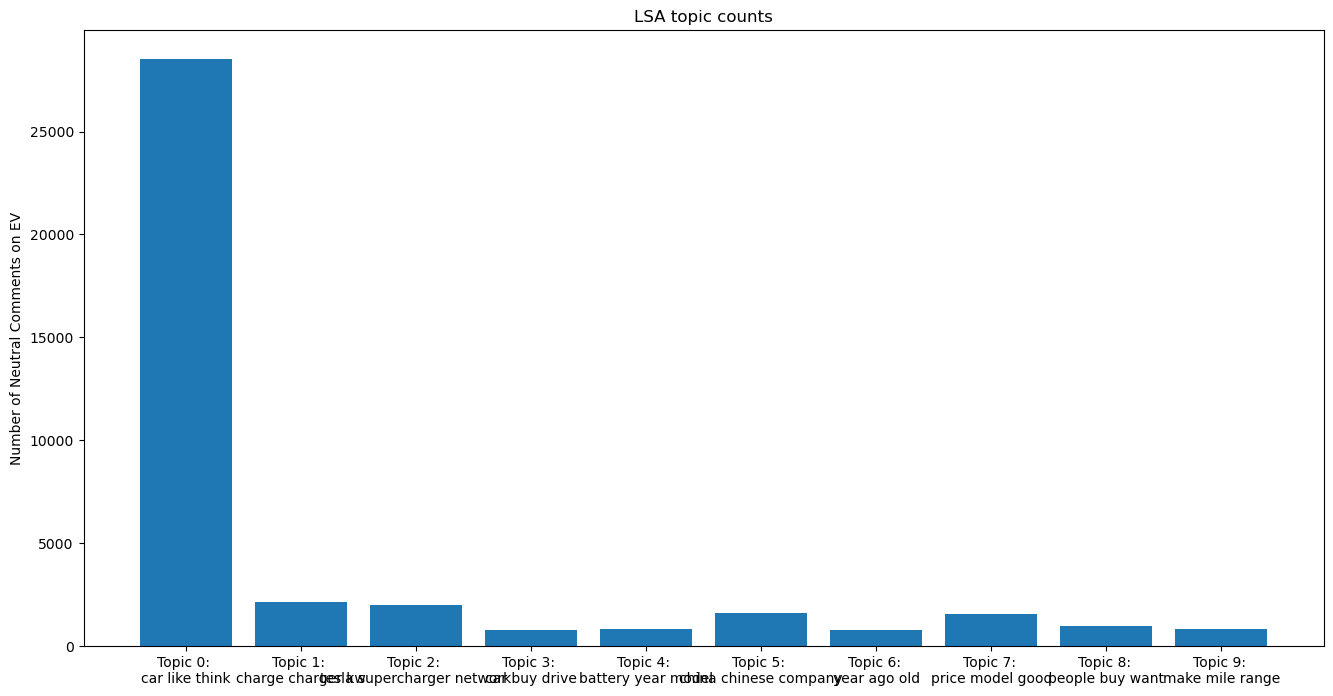

In [793]:
reindexed_data = df_reply['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car need new
Topic 2:  tesla elon reason
Topic 3:  charge charger kw
Topic 4:  year model ago
Topic 5:  say read article
Topic 6:  make think china
Topic 7:  mile range model
Topic 8:  think person robotaxis
Topic 9:  buy use right
Topic 10:  know tell people


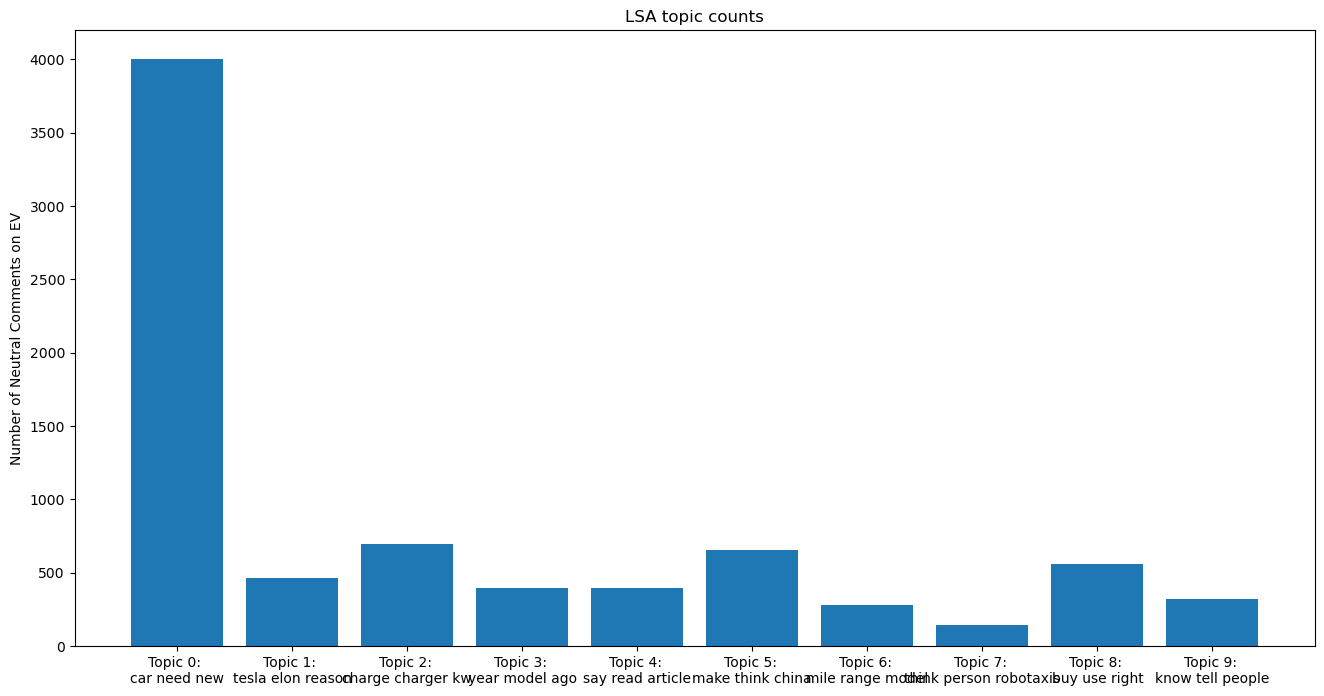

In [792]:
reindexed_data = df_reply[df_reply['vader_sentiment'] == 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car like make
Topic 2:  charge charger kw
Topic 3:  tesla network supercharger
Topic 4:  like good look
Topic 5:  good car pretty
Topic 6:  car drive like
Topic 7:  model year range
Topic 8:  battery like china
Topic 9:  lol battery true
Topic 10:  price tax credit


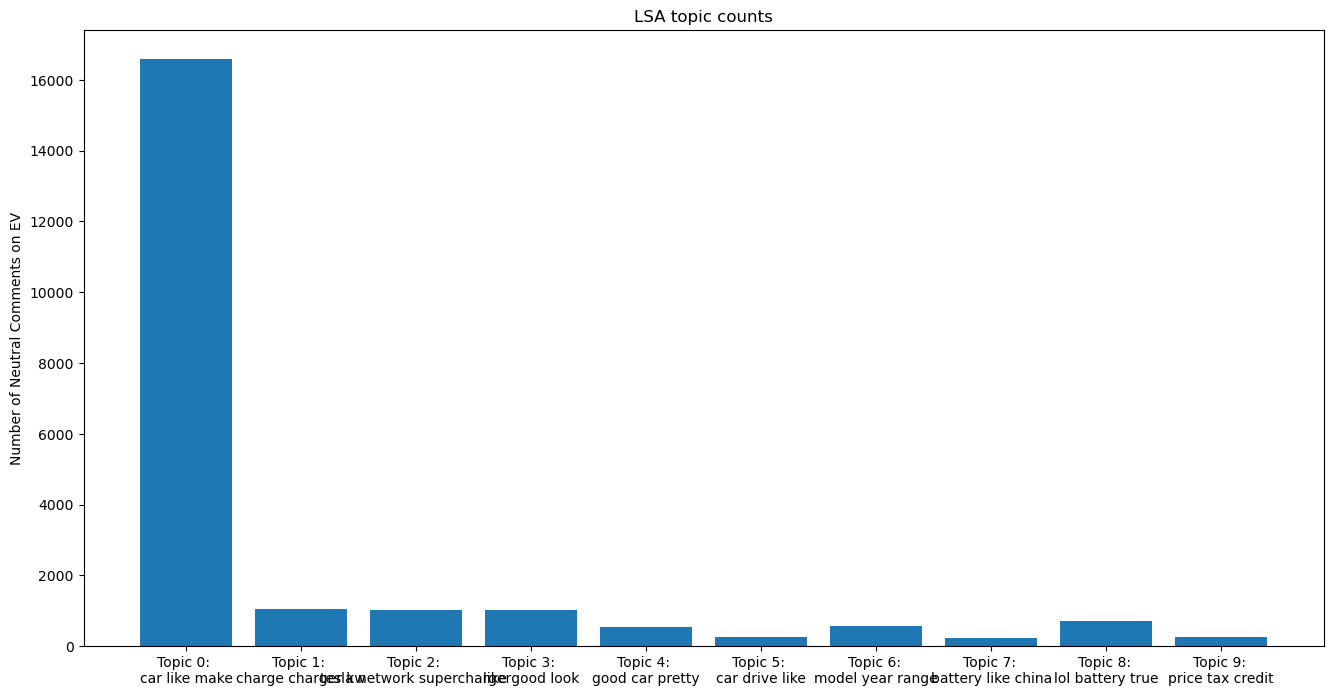

In [791]:
reindexed_data = df_reply[df_reply['vader_sentiment'] > 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car make tesla
Topic 2:  charge kw mile
Topic 3:  tesla supercharger hate
Topic 4:  bad people think
Topic 5:  car drive crash
Topic 6:  people say shit
Topic 7:  battery mile drive
Topic 8:  pay tax gas
Topic 9:  kia hyundai year
Topic 10:  price low buy


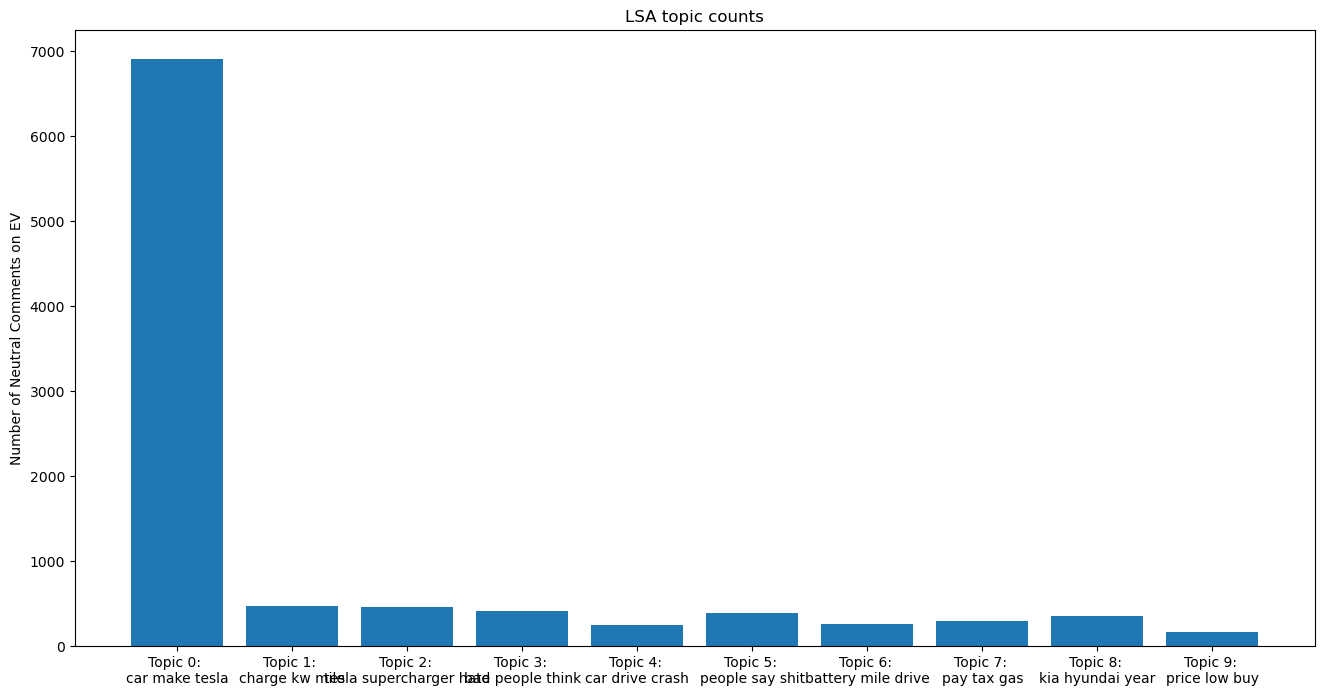

In [790]:
reindexed_data = df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

Topic 1:  car make tesla
Topic 2:  charge stop kw
Topic 3:  tesla supercharger elon
Topic 4:  bad think good
Topic 5:  car drive ugly
Topic 6:  people shit wrong
Topic 7:  battery year mile
Topic 8:  pay year tax
Topic 9:  battery china hate
Topic 10:  kia price hyundai


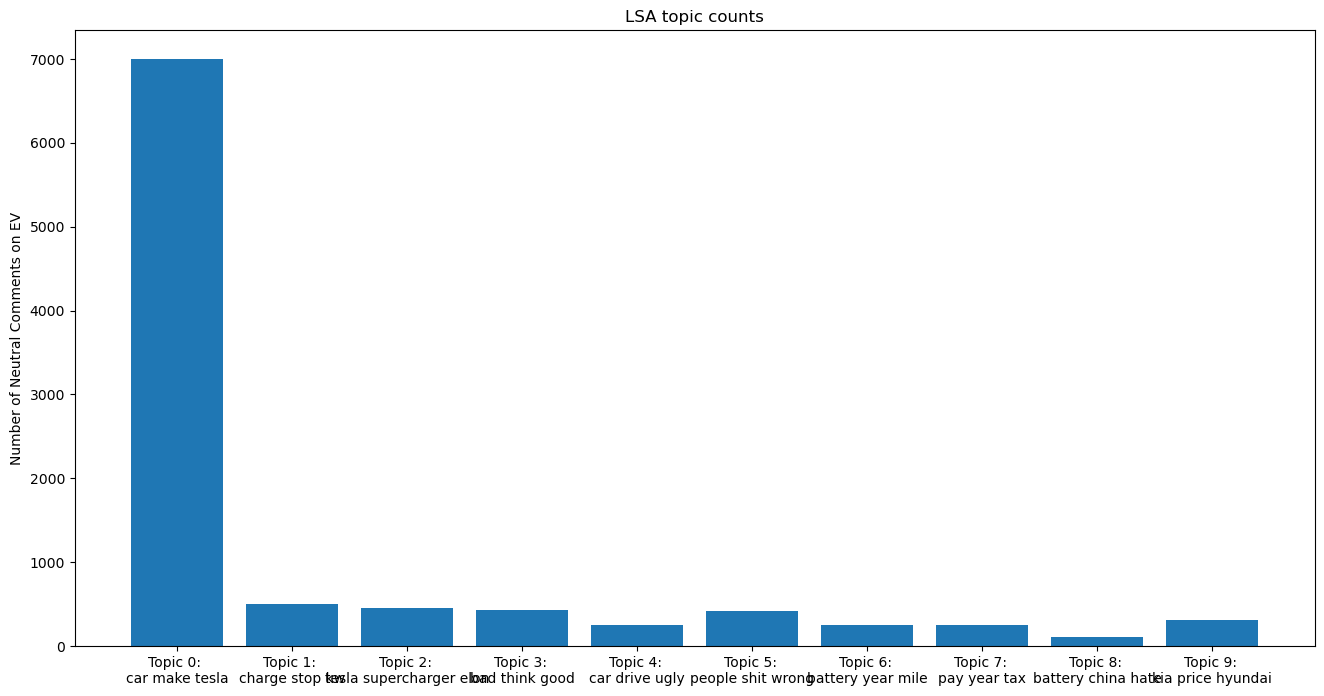

In [789]:
reindexed_data = df_reply[df_reply['vader_sentiment'] < 0]['cleaned_reply']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of Neutral Comments on EV');
ax.set_title('LSA topic counts');
plt.show();

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

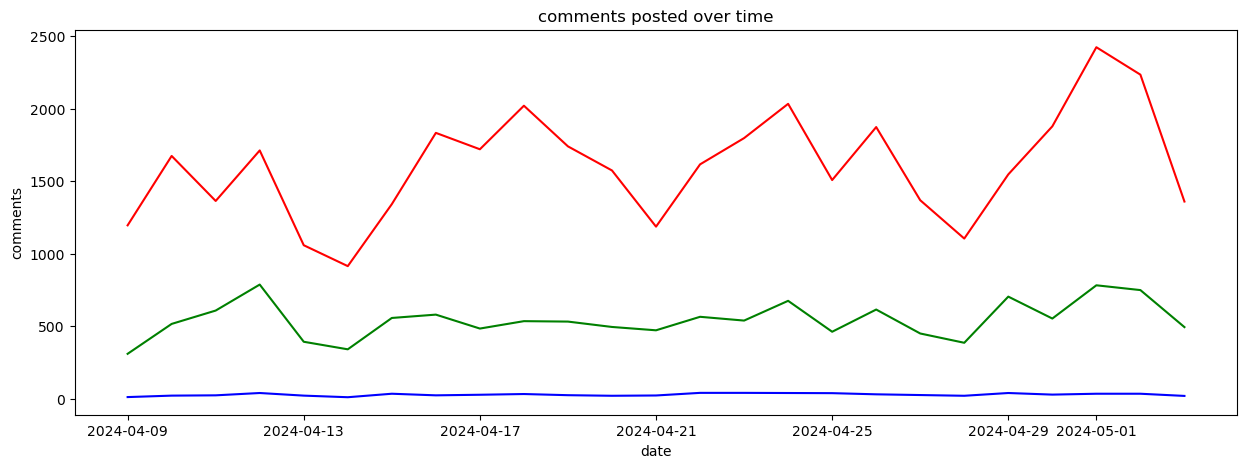

In [784]:
df_title.groupby(df_title["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="b",figsize = (15,5))
df_question.groupby(df_question["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="g",figsize = (15,5))
df_reply.groupby(df_reply["comment_created_utc"].dt.date).size().plot(
    title="comments posted over time",ylabel="comments", xlabel="date", color="r",figsize = (15,5))